# **Extract the Data From the Rar File**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline



In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("App Dataset.rar")

     |████████████████████████████████| 81kB 2.5MB/s 
patool: Extracting App Dataset.rar ...
patool: running /usr/bin/unrar x -- "/content/App Dataset.rar"
patool:     with cwd='./Unpack_i01u6b5u'
patool: ... App Dataset.rar extracted to `App Dataset'.


'App Dataset'

# **Convert the data into CSV format**


1.  To convert given data into the csv format, I have used os functions to change the directory, join the paths & Read the file.
2.  First I make my present working directory to the `B` folder. Then I run a loop on the files present in the folder.
3. I opened a file, concatenate all of the system calls in a form of a string. I stored the data in the form of list of tuples. Each item in the tuple will contain File name, System Calls and Assigned Label.

4. For the `M` folder, I apply the same procedure stated above.
5. Dataframe will contain the File name, System Call & Label as Columns.



In [ ]:
import os
print(os.getcwd())

base_dir = os.path.join(os.getcwd() ,'App Dataset/Dataset')
print(base_dir)

/content
/content/App Dataset/Dataset


In [ ]:
path_B_directory = os.path.join(base_dir , 'B/sys')
B_directory_list = os.listdir( path_B_directory )


In [ ]:
list_to_df = []

In [ ]:

for file_name in B_directory_list:
    
    file1 = open(os.path.join(path_B_directory , file_name),"r")
    s = file1.read()
    s = s.replace('\n',' ')
    sys_calls = s[:-1]
    rows = (file_name,sys_calls,'B')
    list_to_df.append(rows)
    
    

In [ ]:
path_M_directory = os.path.join(base_dir , 'M/sys')
M_directory_list = os.listdir( path_M_directory )


In [ ]:
for file_name in M_directory_list:
    
    file1 = open(os.path.join(path_M_directory , file_name),"r")
    s = file1.read()
    s = s.replace('\n',' ')
    sys_calls = s[:-1]
    rows = (file_name,sys_calls,'M')
    list_to_df.append(rows)
    
    

In [ ]:
import pandas as pd
df = pd.DataFrame(list_to_df, columns = ['Document Name', 'System Calls','Label']) 

In [ ]:
df

,Document Name,System Calls,Label
0,com.chinadeals.apk.sys_names.txt,ioctl pread rt_sigprocmask rt_sigprocmask rt_s...,B
1,chat.cristianogratis.apk.sys_names.txt,dup fcntl close epoll_ctl ioctl ioctl getuid e...,B
2,com.eterno.apk.sys_names.txt,futex ioctl epoll_pwait read recvfrom writev s...,B
3,com.andromo.dev551559.app531086.apk.sys_names.txt,read writev write read read write read read re...,B
4,com.blinkslabs.blinkist.android.apk.sys_names.txt,read read ioctl ioctl writev futex ioctl ioctl...,B
...,...,...,...
5817,a0bffc11168c65beb59c326d88f144f0d750634252a507...,newfstatat ioctl ioctl getuid newfstatat newfs...,M
5818,02c9bddf966b59a8850a7395e7ce5af21ca16c442a0389...,recvfrom recvfrom writev sendto getuid epoll_p...,M
5819,6113bc8bbbdfe89114a12ddfa25ad54eed63367cf21462...,dup fcntl close epoll_ctl ioctl ioctl getuid e...,M
5820,3ddcdc882166b87d3db9d5cc21ccd4c7009e1f134edeeb...,ioctl ioctl faccessat mprotect mprotect mprote...,M


3347
2475


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


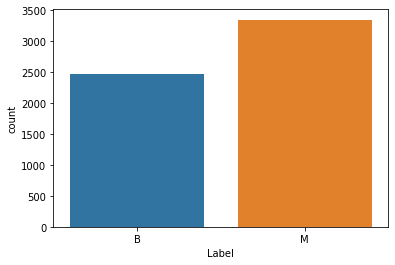

In [ ]:
import seaborn as sns
ax = sns.countplot(df['Label'], label='count')
B , M = df['Label'].value_counts()
print(B)
print(M)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Label'])
print(le.classes_)
df['Label'] = le.transform(df['Label'])
df['Label']

['B' 'M']


0       0
1       0
2       0
3       0
4       0
       ..
5817    1
5818    1
5819    1
5820    1
5821    1
Name: Label, Length: 5822, dtype: int64

# **Question 1 Unigram Model** 

# **Bag of Words Model (Count Occurences of Calls)**
1. For this task I have used the `CountVectorizer` from the sklearn feature extraction.
2. I have fitted and transformed the System Calls Corpus on the CountVectorizer and then converted it into a dataframe.  
3. Then First I seperated the features and the labels follwed by normalization of the Features. 
4. Using train_test_split, I split the data into 85% training and 15% testing.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = df['System Calls']
print(corpus)

0       rt_sigreturn futex ioctl ioctl write mprotect ...
1       futex futex pread mmap munmap mprotect mprotec...
2       recvfrom recvfrom writev sendto getuid epoll_p...
3       futex futex ioctl clock_gettime ioctl clock_ge...
4       write futex mprotect mprotect madvise mprotect...
                              ...                        
5817    getuid epoll_pwait read recvfrom recvfrom writ...
5818    epoll_pwait recvfrom getuid epoll_pwait getuid...
5819    read write write write write read write read r...
5820    recvfrom writev sendto getuid epoll_pwait writ...
5821    read ioctl ioctl ioctl ioctl getuid epoll_pwai...
Name: System Calls, Length: 5822, dtype: object


In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())


['_llseek', 'bind', 'capget', 'clock_gettime', 'clone', 'close', 'connect', 'dup', 'epoll_create1', 'epoll_ctl', 'epoll_pwait', 'eventfd2', 'faccessat', 'fchmod', 'fchmodat', 'fcntl', 'fcntl64', 'fdatasync', 'flock', 'fstat', 'fstat64', 'fstatat64', 'fsync', 'ftruncate', 'ftruncate64', 'futex', 'getcwd', 'getdents64', 'getegid', 'getegid32', 'geteuid', 'geteuid32', 'getpid', 'getppid', 'getpriority', 'getrlimit', 'getsockname', 'getsockopt', 'gettid', 'gettimeofday', 'getuid', 'getuid32', 'inotify_add_watch', 'inotify_init1', 'inotify_rm_watch', 'ioctl', 'kill', 'listen', 'lseek', 'madvise', 'mkdirat', 'mknodat', 'mlock', 'mmap', 'mmap2', 'mprotect', 'mremap', 'msync', 'munlock', 'munmap', 'nanosleep', 'newfstatat', 'openat', 'pipe2', 'ppoll', 'prctl', 'pread', 'pread64', 'pwrite', 'pwrite64', 'read', 'readlinkat', 'recvfrom', 'renameat', 'rt_sigaction', 'rt_sigprocmask', 'rt_sigreturn', 'sched_getparam', 'sched_getscheduler', 'sched_yield', 'sendmsg', 'sendto', 'setpriority', 'setrlim

In [ ]:
df_bag_words = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
df_bag_words['Document Name'] = df['Document Name']
cols = df_bag_words.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_bag_words = df_bag_words[cols]
df_bag_words

,Document Name,_llseek,bind,capget,clock_gettime,clone,close,connect,dup,epoll_create1,epoll_ctl,epoll_pwait,eventfd2,faccessat,fchmod,fchmodat,fcntl,fcntl64,fdatasync,flock,fstat,fstat64,fstatat64,fsync,ftruncate,ftruncate64,futex,getcwd,getdents64,getegid,getegid32,geteuid,geteuid32,getpid,getppid,getpriority,getrlimit,getsockname,getsockopt,gettid,...,openat,pipe2,ppoll,prctl,pread,pread64,pwrite,pwrite64,read,readlinkat,recvfrom,renameat,rt_sigaction,rt_sigprocmask,rt_sigreturn,sched_getparam,sched_getscheduler,sched_yield,sendmsg,sendto,setpriority,setrlimit,setsockopt,shutdown,sigaction,sigreturn,socket,socketpair,stat64,statfs,statfs64,tgkill,tkill,ugetrlimit,uname,unlinkat,utimensat,wait4,write,writev
0,com.framentos.fantamatic.apk.sys_names.txt,0,0,0,0,16,156,0,43,0,72,1706,0,24,0,0,134,0,0,0,130,0,0,0,0,0,216,0,2,0,0,18,0,0,0,6,1,0,0,0,...,76,0,0,5,270,0,0,0,181,1,1581,0,0,158,1,0,0,0,3,1442,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,499,444
1,com.allaboutnews.calcionotizie.apk.sys_names.txt,0,0,0,0,49,220,0,52,1,114,2776,0,28,0,3,80,0,0,0,91,0,0,0,0,0,248,0,6,0,0,0,0,0,1,0,1,0,0,0,...,124,0,0,4,299,0,0,0,4707,1,1833,0,0,21,1,0,0,0,5,1620,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1097,738
2,com.arabdev.dawae.lkalf.apk.sys_names.txt,0,0,0,0,15,177,0,40,0,54,1604,0,9,0,2,184,0,8,0,91,0,0,0,0,0,211,0,2,0,0,14,0,0,0,6,0,0,0,0,...,104,0,0,2,161,0,42,0,325,0,1679,0,0,103,0,0,0,0,0,1389,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,641,773
3,com.appspot.scruffapp.apk.sys_names.txt,0,0,0,4118,23,60,0,3,0,15,464,0,28,0,6,0,169,15,0,0,201,116,0,0,0,77,0,0,0,0,0,34,0,3,2,0,0,0,0,...,52,0,0,0,0,145,0,45,198,0,955,0,0,5,1,0,0,33,0,759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,495,255
4,com.exatools.laserlevel.apk.sys_names.txt,0,0,0,0,1,107,0,28,0,66,1205,0,1,0,2,50,0,0,0,44,0,0,2,0,0,71,0,0,0,0,0,0,0,0,1,0,0,0,0,...,42,0,0,2,24,0,0,0,387,0,3548,1,0,33,1,0,0,9,0,3032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,752,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,16aac4e2964bc8ff75ad07f64ce8991f433aaebe6e790e...,0,0,0,0,2,81,0,31,0,38,1096,0,1,0,1,16,0,0,0,1,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18,0,0,4,179,0,0,0,712,0,2494,0,0,409,0,0,0,0,0,1986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,768,369
5818,89aa148a81e8aacf75c48c673cf0537a284d8bfa33ea78...,0,0,0,0,4,79,0,35,0,52,543,0,0,0,1,26,0,0,0,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,4,41,0,0,0,1246,0,747,0,0,76,1,0,0,0,0,637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1333,133
5819,4d5ff01cc5f88bdb5c894c65b60bbb913a11422cea98a0...,0,0,0,0,23,197,1,61,0,82,757,0,3,0,0,39,0,0,0,2,0,0,0,0,0,30,0,6,0,0,0,0,0,0,0,0,0,0,0,...,70,0,1,2,257,0,0,0,1673,0,1279,0,0,329,1,0,0,0,0,1131,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1741,418
5820,16ab51f7c85b01e5cc3f6cd3747bd0a4a70cc6d9d8b8f3...,0,0,0,0,5,66,0,30,0,23,2410,0,1,0,0,7,0,0,0,7,0,0,0,0,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,0,0,3,31,0,0,0,1562,0,1611,0,0,448,1,0,0,6,0,1399,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1541,466


In [ ]:
from sklearn import preprocessing
df_bag_words = df_bag_words.drop(['Document Name'],axis=1)
X = df_bag_words
Y = df['Label']
X = preprocessing.normalize(X)
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.10974376,
        0.09764775],
       [0.        , 0.        , 0.        , ..., 0.        , 0.14663565,
        0.09864823],
       [0.        , 0.        , 0.        , ..., 0.        , 0.18195247,
        0.21942163],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.50041166,
        0.12014479],
       [0.        , 0.        , 0.        , ..., 0.        , 0.32259276,
        0.09755238],
       [0.        , 0.        , 0.        , ..., 0.        , 0.32576354,
        0.06630886]])

In [ ]:
from sklearn import model_selection, svm

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,df['Label'],test_size=0.15,random_state=42)

## **1) Linear Kernel**
1. I have used the Linear Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_LinearKernel = svm.SVC(C=1.5, kernel='linear', gamma='auto')
SVM_LinearKernel.fit(Train_X,Train_Y)

predictions_SVM_LinearKernel = SVM_LinearKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_linear_occ = accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100)

SVM Accuracy Score ->  92.79176201372998


Confusion matrix ->
[[368  25]
 [ 38 443]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       393
           1       0.95      0.92      0.93       481

    accuracy                           0.93       874
   macro avg       0.93      0.93      0.93       874
weighted avg       0.93      0.93      0.93       874



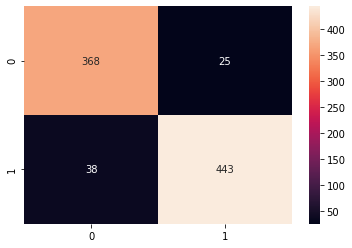

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_LinearKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_LinearKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_LinearKernel)

sns.heatmap(cm,annot=True,fmt='g')

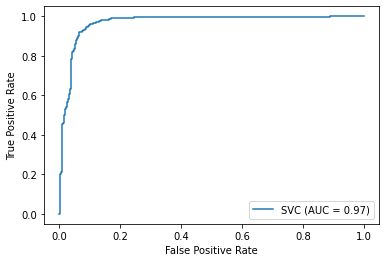

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(SVM_LinearKernel, Test_X, Test_Y) 
plt.show()

## **2) Polynomial Kernel**
1. I have used the Polynomial Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_PolyKernel = svm.SVC(C=1.0, kernel='poly', degree=3)
SVM_PolyKernel.fit(Train_X,Train_Y)

predictions_SVM_PolyKernel = SVM_PolyKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_poly_occ = accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100)

SVM Accuracy Score ->  95.53775743707094


Confusion matrix ->
[[371  22]
 [ 17 464]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       393
           1       0.95      0.96      0.96       481

    accuracy                           0.96       874
   macro avg       0.96      0.95      0.95       874
weighted avg       0.96      0.96      0.96       874



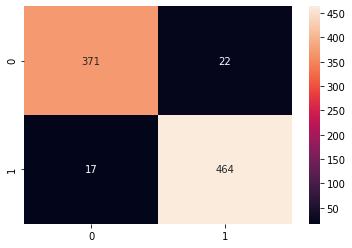

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_PolyKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_PolyKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_PolyKernel)

sns.heatmap(cm,annot=True,fmt='g')

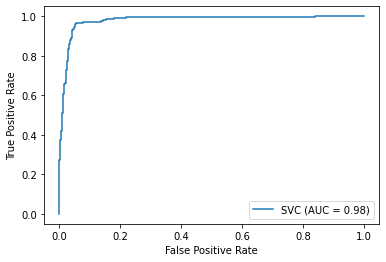

In [ ]:
metrics.plot_roc_curve(SVM_PolyKernel, Test_X, Test_Y)  
plt.show()

## **3) Sigmoid Kernel**
1. I have used the Sigmoid Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_SigmoidKernel = svm.SVC(C=1.5, kernel='sigmoid', gamma='auto')
SVM_SigmoidKernel.fit(Train_X,Train_Y)

predictions_SVM_SigmoidKernel = SVM_SigmoidKernel.predict(Test_X)

In [ ]:
from sklearn.metrics import accuracy_score
acc_sigmoid_occ = accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100)

SVM Accuracy Score ->  86.72768878718536


Confusion matrix ->
[[359  34]
 [ 82 399]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       393
           1       0.92      0.83      0.87       481

    accuracy                           0.87       874
   macro avg       0.87      0.87      0.87       874
weighted avg       0.87      0.87      0.87       874



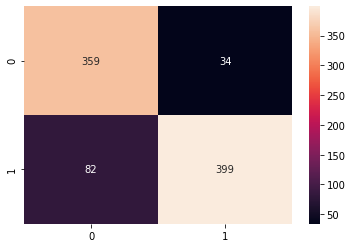

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_SigmoidKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel)

sns.heatmap(cm,annot=True,fmt='g')

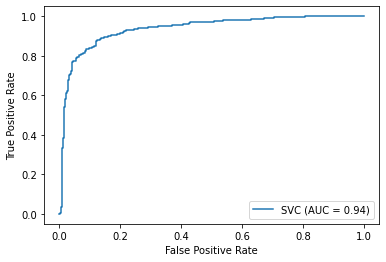

In [ ]:
metrics.plot_roc_curve(SVM_SigmoidKernel, Test_X, Test_Y) 
plt.show()

## **4) SVM RBF Kernel**
1. I have used the RBF Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_rbfKernel = svm.SVC(C=1.5, kernel='rbf', gamma='auto')
SVM_rbfKernel.fit(Train_X,Train_Y)

predictions_SVM_rbfKernel = SVM_rbfKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_rbf_occ = accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100)

SVM Accuracy Score ->  87.29977116704805


Confusion matrix ->
[[362  31]
 [ 80 401]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       393
           1       0.93      0.83      0.88       481

    accuracy                           0.87       874
   macro avg       0.87      0.88      0.87       874
weighted avg       0.88      0.87      0.87       874



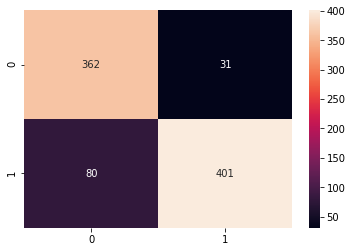

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_rbfKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_rbfKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_rbfKernel)

sns.heatmap(cm,annot=True,fmt='g')

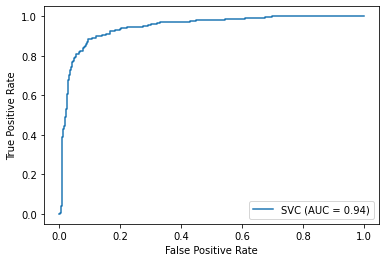

In [ ]:
metrics.plot_roc_curve(SVM_rbfKernel, Test_X, Test_Y) 
plt.show()

# **Boolean occurence Model**

1. For this task I have used the `CountVectorizer` from the sklearn feature extraction.
2. I have fitted and transformed the System Calls Corpus on the CountVectorizer and then converted it into a dataframe. 
3. If the value in the dataframe is greater than 0 than it is replaced by 1 else it is kept as same. 
3. Then  I seperated the features and the labels.
4. Using train_test_split, I split the data into 85% training and 15% testing.


In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

df_bool = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

df_bool=np.where(df_bool>=1,1,0)
df_bool = pd.DataFrame(df_bool, columns = cols[1:])
df_bool['Document Name'] = df['Document Name']
cols = df_bool.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_bool = df_bool[cols]

df_bool

,Document Name,_llseek,bind,capget,clock_gettime,clone,close,connect,dup,epoll_create1,epoll_ctl,epoll_pwait,eventfd2,faccessat,fchmod,fchmodat,fcntl,fcntl64,fdatasync,flock,fstat,fstat64,fstatat64,fsync,ftruncate,ftruncate64,futex,getcwd,getdents64,getegid,getegid32,geteuid,geteuid32,getpid,getppid,getpriority,getrlimit,getsockname,getsockopt,gettid,...,openat,pipe2,ppoll,prctl,pread,pread64,pwrite,pwrite64,read,readlinkat,recvfrom,renameat,rt_sigaction,rt_sigprocmask,rt_sigreturn,sched_getparam,sched_getscheduler,sched_yield,sendmsg,sendto,setpriority,setrlimit,setsockopt,shutdown,sigaction,sigreturn,socket,socketpair,stat64,statfs,statfs64,tgkill,tkill,ugetrlimit,uname,unlinkat,utimensat,wait4,write,writev
0,com.framentos.fantamatic.apk.sys_names.txt,0,0,0,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,...,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
1,com.allaboutnews.calcionotizie.apk.sys_names.txt,0,0,0,0,1,1,0,1,1,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
2,com.arabdev.dawae.lkalf.apk.sys_names.txt,0,0,0,0,1,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1
3,com.appspot.scruffapp.apk.sys_names.txt,0,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,com.exatools.laserlevel.apk.sys_names.txt,0,0,0,0,1,1,0,1,0,1,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0,1,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,16aac4e2964bc8ff75ad07f64ce8991f433aaebe6e790e...,0,0,0,0,1,1,0,1,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
5818,89aa148a81e8aacf75c48c673cf0537a284d8bfa33ea78...,0,0,0,0,1,1,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
5819,4d5ff01cc5f88bdb5c894c65b60bbb913a11422cea98a0...,0,0,0,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
5820,16ab51f7c85b01e5cc3f6cd3747bd0a4a70cc6d9d8b8f3...,0,0,0,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
from sklearn import preprocessing
df_bool = df_bool.drop(['Document Name'],axis=1)
X = df_bool
Y = df['Label']


In [ ]:
from sklearn import model_selection, svm

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,df['Label'],test_size=0.15,random_state=42)

## **1) Linear Kernel**
1. I have used the Linear Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_LinearKernel = svm.SVC(C=1.8, kernel='linear', gamma='auto')
SVM_LinearKernel.fit(Train_X,Train_Y)

predictions_SVM_LinearKernel = SVM_LinearKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_linear_bool = accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100)

SVM Accuracy Score ->  89.7025171624714


Confusion matrix ->
[[338  55]
 [ 35 446]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       393
           1       0.89      0.93      0.91       481

    accuracy                           0.90       874
   macro avg       0.90      0.89      0.90       874
weighted avg       0.90      0.90      0.90       874



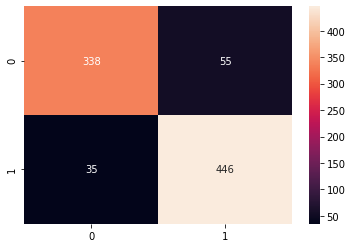

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_LinearKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_LinearKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_LinearKernel)

sns.heatmap(cm,annot=True,fmt='g')

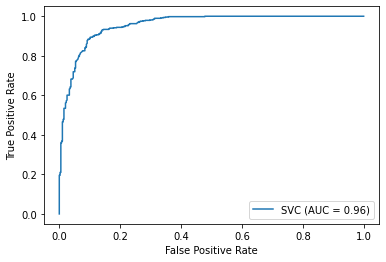

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(SVM_LinearKernel, Test_X, Test_Y) 
plt.show()

## **2) Polynomial Kernel**

1. I have used the Polynomial Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 






In [ ]:
SVM_PolyKernel = svm.SVC(C=1.0, kernel='poly', degree=3)
SVM_PolyKernel.fit(Train_X,Train_Y)

predictions_SVM_PolyKernel = SVM_PolyKernel.predict(Test_X)


In [ ]:
from sklearn.metrics import accuracy_score
acc_poly_bool = accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100)

SVM Accuracy Score ->  90.16018306636155


Confusion matrix ->
[[343  50]
 [ 36 445]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       393
           1       0.90      0.93      0.91       481

    accuracy                           0.90       874
   macro avg       0.90      0.90      0.90       874
weighted avg       0.90      0.90      0.90       874



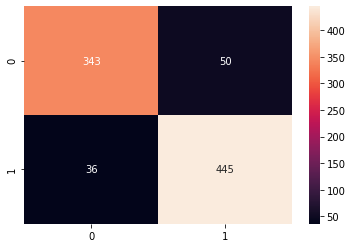

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_PolyKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_PolyKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_PolyKernel)

sns.heatmap(cm,annot=True,fmt='g')

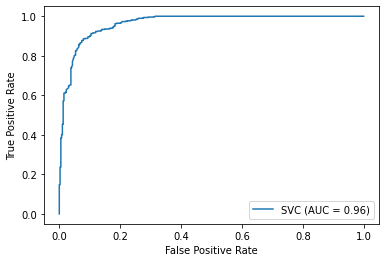

In [ ]:
metrics.plot_roc_curve(SVM_PolyKernel, Test_X, Test_Y)  
plt.show()

## **3) Sigmoid Kernel**
1. I have used the Sigmoid Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_SigmoidKernel = svm.SVC(C=1.5, kernel='sigmoid', gamma='auto')
SVM_SigmoidKernel.fit(Train_X,Train_Y)

predictions_SVM_SigmoidKernel = SVM_SigmoidKernel.predict(Test_X)

In [ ]:
from sklearn.metrics import accuracy_score
acc_sigmoid_bool = accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100)

SVM Accuracy Score ->  87.87185354691076


Confusion matrix ->
[[308  85]
 [ 21 460]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       393
           1       0.84      0.96      0.90       481

    accuracy                           0.88       874
   macro avg       0.89      0.87      0.87       874
weighted avg       0.89      0.88      0.88       874



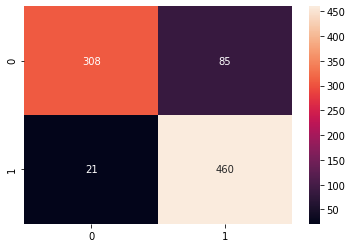

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_SigmoidKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel)

sns.heatmap(cm,annot=True,fmt='g')

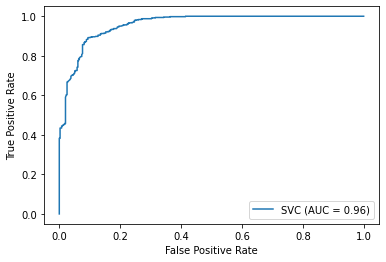

In [ ]:
metrics.plot_roc_curve(SVM_SigmoidKernel, Test_X, Test_Y) 
plt.show()

## **4) SVM RBF Kernel**
1. I have used the RBF Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_rbfKernel = svm.SVC(C=1.5, kernel='rbf', gamma='auto')
SVM_rbfKernel.fit(Train_X,Train_Y)

predictions_SVM_rbfKernel = SVM_rbfKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_rbf_bool = accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100)

SVM Accuracy Score ->  88.32951945080092


Confusion matrix ->
[[325  68]
 [ 34 447]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.91      0.83      0.86       393
           1       0.87      0.93      0.90       481

    accuracy                           0.88       874
   macro avg       0.89      0.88      0.88       874
weighted avg       0.88      0.88      0.88       874



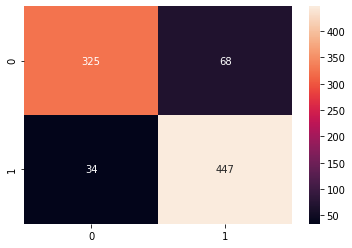

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_rbfKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_rbfKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_rbfKernel)

sns.heatmap(cm,annot=True,fmt='g')

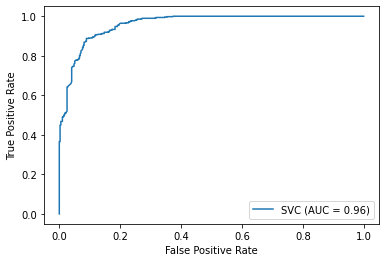

In [ ]:
metrics.plot_roc_curve(SVM_rbfKernel, Test_X, Test_Y) 
plt.show()

# **Term Frequency Inverse Doc Frequency Vectorization Tf-Idf Model**

1. For this task I have used the `TfidfVectorizer` from the sklearn feature extraction.
2. I have fitted and transformed the System Calls Corpus on the TfidfVectorizer and then converted it into a dataframe. 
3. I have also displayed the vocubalary obtained by fitting and transforming the corpus. 
3. Then  I seperated the features and the labels.
4. Using train_test_split, I split the data into 85% training and 15% testing.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df['System Calls']
print(corpus)


0       rt_sigreturn futex ioctl ioctl write mprotect ...
1       futex futex pread mmap munmap mprotect mprotec...
2       recvfrom recvfrom writev sendto getuid epoll_p...
3       futex futex ioctl clock_gettime ioctl clock_ge...
4       write futex mprotect mprotect madvise mprotect...
                              ...                        
5817    getuid epoll_pwait read recvfrom recvfrom writ...
5818    epoll_pwait recvfrom getuid epoll_pwait getuid...
5819    read write write write write read write read r...
5820    recvfrom writev sendto getuid epoll_pwait writ...
5821    read ioctl ioctl ioctl ioctl getuid epoll_pwai...
Name: System Calls, Length: 5822, dtype: object


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)



In [ ]:
df_tfidf = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
df_tfidf['Document Name'] = df['Document Name']
cols = df_tfidf.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_tfidf = df_tfidf[cols]
df_tfidf

,Document Name,_llseek,bind,capget,clock_gettime,clone,close,connect,dup,epoll_create1,epoll_ctl,epoll_pwait,eventfd2,faccessat,fchmod,fchmodat,fcntl,fcntl64,fdatasync,flock,fstat,fstat64,fstatat64,fsync,ftruncate,ftruncate64,futex,getcwd,getdents64,getegid,getegid32,geteuid,geteuid32,getpid,getppid,getpriority,getrlimit,getsockname,getsockopt,gettid,...,openat,pipe2,ppoll,prctl,pread,pread64,pwrite,pwrite64,read,readlinkat,recvfrom,renameat,rt_sigaction,rt_sigprocmask,rt_sigreturn,sched_getparam,sched_getscheduler,sched_yield,sendmsg,sendto,setpriority,setrlimit,setsockopt,shutdown,sigaction,sigreturn,socket,socketpair,stat64,statfs,statfs64,tgkill,tkill,ugetrlimit,uname,unlinkat,utimensat,wait4,write,writev
0,com.framentos.fantamatic.apk.sys_names.txt,0.0,0.0,0.0,0.000000,0.004144,0.033562,0.000,0.009757,0.000000,0.016417,0.366086,0.0,0.006525,0.0,0.000000,0.032630,0.000000,0.000000,0.0,0.035788,0.000000,0.000000,0.000000,0.0,0.0,0.046911,0.0,0.001026,0.0,0.0,0.011042,0.00000,0.0,0.000000,0.003571,0.000555,0.0,0.0,0.0,...,0.016631,0.0,0.000000,0.001323,0.062073,0.000000,0.000000,0.000000,0.038847,0.000478,0.356044,0.000000,0.0,0.034658,0.000367,0.0,0.0,0.000000,0.001901,0.328167,0.001489,0.0,0.000000,0.0,0.0,0.0,0.0,0.000483,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.112067,0.097478
1,com.allaboutnews.calcionotizie.apk.sys_names.txt,0.0,0.0,0.0,0.000000,0.007769,0.028976,0.000,0.007224,0.000469,0.015913,0.364678,0.0,0.004661,0.0,0.000706,0.011926,0.000000,0.000000,0.0,0.015336,0.000000,0.000000,0.000000,0.0,0.0,0.032973,0.0,0.001884,0.0,0.0,0.000000,0.00000,0.0,0.000418,0.000000,0.000340,0.0,0.0,0.0,...,0.016612,0.0,0.000000,0.000648,0.042082,0.000000,0.000000,0.000000,0.618456,0.000293,0.252709,0.000000,0.0,0.002820,0.000225,0.0,0.0,0.000000,0.001940,0.225700,0.000608,0.0,0.000000,0.0,0.0,0.0,0.0,0.000592,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.150824,0.099190
2,com.arabdev.dawae.lkalf.apk.sys_names.txt,0.0,0.0,0.0,0.000000,0.004948,0.048504,0.000,0.011561,0.000000,0.015683,0.438422,0.0,0.003117,0.0,0.000979,0.057071,0.000000,0.007156,0.0,0.031910,0.000000,0.000000,0.000000,0.0,0.0,0.058370,0.0,0.001307,0.0,0.0,0.010939,0.00000,0.0,0.000000,0.004549,0.000000,0.0,0.0,0.0,...,0.028988,0.0,0.000000,0.000674,0.047147,0.000000,0.037077,0.000000,0.088848,0.000000,0.481622,0.000000,0.0,0.028779,0.000000,0.0,0.0,0.000000,0.000000,0.402639,0.000632,0.0,0.000000,0.0,0.0,0.0,0.0,0.001231,0.0,0.001076,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.183366,0.216166
3,com.appspot.scruffapp.apk.sys_names.txt,0.0,0.0,0.0,0.981188,0.001976,0.004282,0.000,0.000226,0.000000,0.001134,0.033025,0.0,0.002525,0.0,0.000765,0.000000,0.047467,0.003494,0.0,0.000000,0.061651,0.032972,0.000000,0.0,0.0,0.005547,0.0,0.000000,0.0,0.0,0.000000,0.01356,0.0,0.000679,0.000395,0.000000,0.0,0.0,0.0,...,0.003774,0.0,0.000000,0.000000,0.000000,0.040658,0.000000,0.019325,0.014095,0.000000,0.071334,0.000000,0.0,0.000364,0.000122,0.0,0.0,0.004219,0.000000,0.057292,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.036873,0.018569
4,com.exatools.laserlevel.apk.sys_names.txt,0.0,0.0,0.0,0.000000,0.000230,0.020402,0.000,0.005631,0.000000,0.013337,0.229172,0.0,0.000241,0.0,0.000681,0.010791,0.000000,0.000000,0.0,0.010735,0.000000,0.000000,0.000952,0.0,0.0,0.013666,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000528,0.000000,0.0,0.0,0.0,...,0.008146,0.0,0.000000,0.000469,0.004890,0.000000,0.000000,0.000000,0.073614,0.000000,0.708152,0.000524,0.0,0.006416,0.000325,0.0,0.0,0.003074,0.000000,0.611546,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.001008,0.0,0.0,0.149681,0.019652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
from sklearn import model_selection, svm

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['System Calls'],df['Label'],test_size=0.3,random_state=42)

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['System Calls'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

## **1) Linear Kernel**
1. I have used the Linear Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_LinearKernel = svm.SVC(C=1.0, kernel='linear', gamma='auto')
SVM_LinearKernel.fit(Train_X_Tfidf,Train_Y)

predictions_SVM_LinearKernel = SVM_LinearKernel.predict(Test_X_Tfidf)



In [ ]:
from sklearn.metrics import accuracy_score
acc_linear_tfidf = accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100)

SVM Accuracy Score ->  91.52833428734975


Confusion matrix ->
[[714  50]
 [ 98 885]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       764
           1       0.95      0.90      0.92       983

    accuracy                           0.92      1747
   macro avg       0.91      0.92      0.91      1747
weighted avg       0.92      0.92      0.92      1747



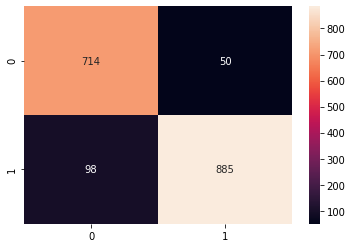

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_LinearKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_LinearKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_LinearKernel)

sns.heatmap(cm,annot=True,fmt='g')

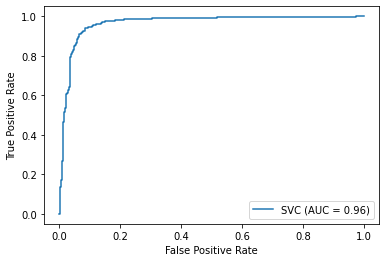

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(SVM_LinearKernel, Test_X_Tfidf, Test_Y) 
plt.show()

## **2) Polynomial Kernel**
1. I have used the Polynomial Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_PolyKernel = svm.SVC(C=1.3, kernel='poly', degree=102)
SVM_PolyKernel.fit(Train_X_Tfidf,Train_Y)

predictions_SVM_PolyKernel = SVM_PolyKernel.predict(Test_X_Tfidf)



In [ ]:
from sklearn.metrics import accuracy_score
acc_poly_tfidf = accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100)

SVM Accuracy Score ->  87.80767029192901


Confusion matrix ->
[[732  32]
 [181 802]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       764
           1       0.96      0.82      0.88       983

    accuracy                           0.88      1747
   macro avg       0.88      0.89      0.88      1747
weighted avg       0.89      0.88      0.88      1747



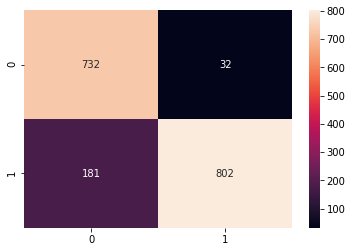

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_PolyKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_PolyKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_PolyKernel)

sns.heatmap(cm,annot=True,fmt='g')

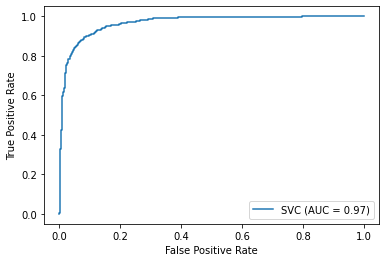

In [ ]:
metrics.plot_roc_curve(SVM_PolyKernel, Test_X_Tfidf, Test_Y)  
plt.show()

## **3) Sigmoid Kernel**
1. I have used the Sigmoid Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_SigmoidKernel = svm.SVC(C=1.0, kernel='sigmoid', gamma='auto')
SVM_SigmoidKernel.fit(Train_X_Tfidf,Train_Y)

predictions_SVM_SigmoidKernel = SVM_SigmoidKernel.predict(Test_X_Tfidf)

In [ ]:
from sklearn.metrics import accuracy_score
acc_Sigmoid_tfidf = accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100)

SVM Accuracy Score ->  84.94562106468231


Confusion matrix ->
[[674  90]
 [173 810]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       764
           1       0.90      0.82      0.86       983

    accuracy                           0.85      1747
   macro avg       0.85      0.85      0.85      1747
weighted avg       0.85      0.85      0.85      1747



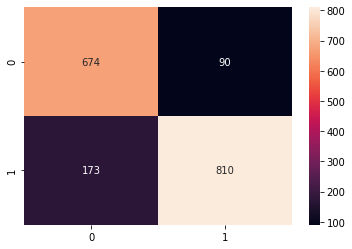

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_SigmoidKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel)

sns.heatmap(cm,annot=True,fmt='g')

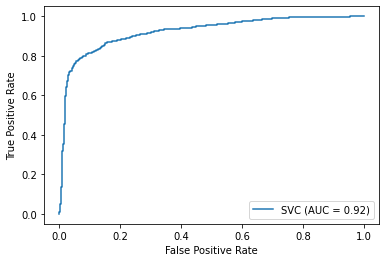

In [ ]:
metrics.plot_roc_curve(SVM_SigmoidKernel, Test_X_Tfidf, Test_Y) 
plt.show()

## **4) SVM RBF Kernel**
1. I have used the RBF Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_rbfKernel = svm.SVC(C=1.0, kernel='rbf', gamma='auto')
SVM_rbfKernel.fit(Train_X_Tfidf,Train_Y)

predictions_SVM_rbfKernel = SVM_rbfKernel.predict(Test_X_Tfidf)



In [ ]:
from sklearn.metrics import accuracy_score
acc_rbf_tfidf = accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100)

SVM Accuracy Score ->  86.4338866628506


Confusion matrix ->
[[697  67]
 [170 813]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       764
           1       0.92      0.83      0.87       983

    accuracy                           0.86      1747
   macro avg       0.86      0.87      0.86      1747
weighted avg       0.87      0.86      0.86      1747



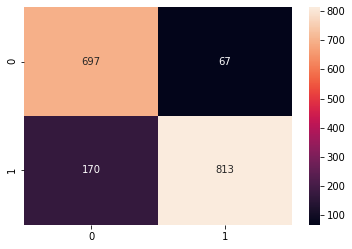

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_rbfKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_rbfKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_rbfKernel)

sns.heatmap(cm,annot=True,fmt='g')

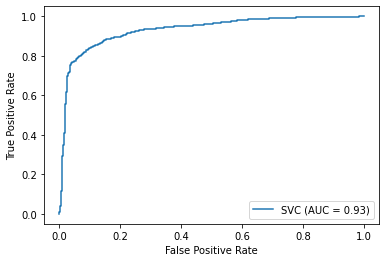

In [ ]:
metrics.plot_roc_curve(SVM_rbfKernel, Test_X_Tfidf, Test_Y) 
plt.show()

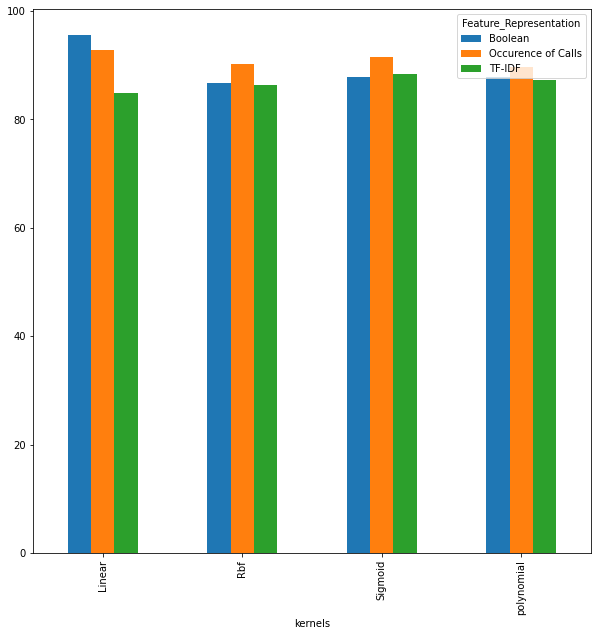

In [ ]:
kernels = ['Linear','polynomial','Sigmoid','Rbf',]
feat_rep = ['Occurence of Calls','Boolean','TF-IDF']

acc = [acc_linear_occ,acc_linear_bool,acc_linear_tfidf,acc_poly_bool,acc_poly_occ,acc_poly_tfidf,acc_sigmoid_bool,acc_sigmoid_occ,acc_Sigmoid_tfidf,acc_rbf_occ,acc_rbf_bool,acc_rbf_tfidf]
x = []
count = 0
for i in range(3):
  for j in range(4):
    x.append([kernels[(j+4)%4], feat_rep[i], acc[count]])
    count += 1
f = pd.DataFrame(x,columns=['kernels', 'Feature_Representation', 'Accuracy'])
f.pivot('kernels','Feature_Representation','Accuracy').plot(kind='bar',figsize=(10,10))


# **Question 2**

# **2 Sequence Model(Bigram Model)**




## Occurence of Calls Model (Bag of Words) 
1. For this task I have used the `CountVectorizer` from the sklearn feature extraction. 
2. I have fitted and transformed the System Calls Corpus on the CountVectorizer and then converted it into a dataframe. Here, I have choose ngram_range parameter to be (2,2) to generate pair wise features.  
3. Then First I seperated the features and the labels follwed by normalization of the Features. 
4. Using train_test_split, I split the data into 85% training and 15% testing.  

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = df['System Calls']
print(corpus)


0       ioctl pread rt_sigprocmask rt_sigprocmask rt_s...
1       dup fcntl close epoll_ctl ioctl ioctl getuid e...
2       futex ioctl epoll_pwait read recvfrom writev s...
3       read writev write read read write read read re...
4       read read ioctl ioctl writev futex ioctl ioctl...
                              ...                        
5817    newfstatat ioctl ioctl getuid newfstatat newfs...
5818    recvfrom recvfrom writev sendto getuid epoll_p...
5819    dup fcntl close epoll_ctl ioctl ioctl getuid e...
5820    ioctl ioctl faccessat mprotect mprotect mprote...
5821    getuid epoll_pwait getuid epoll_pwait read new...
Name: System Calls, Length: 5822, dtype: object


In [ ]:
vectorizer = CountVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(corpus)



In [ ]:
df_bag_words = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

df_bag_words['Document Name'] = df['Document Name']
cols = df_bag_words.columns.tolist()

cols = cols[-1:] + cols[:-1]
df_bag_words = df_bag_words[cols]
df_bag_words

,Document Name,_llseek _llseek,_llseek clock_gettime,_llseek close,_llseek faccessat,_llseek fcntl64,_llseek fstat64,_llseek fstatat64,_llseek ftruncate64,_llseek futex,_llseek madvise,_llseek mmap2,_llseek mprotect,_llseek openat,_llseek read,_llseek write,bind fcntl,bind getsockname,bind ppoll,bind setsockopt,bind socket,capget futex,clock_gettime _llseek,clock_gettime clock_gettime,clock_gettime clone,clock_gettime close,clock_gettime dup,clock_gettime epoll_ctl,clock_gettime epoll_pwait,clock_gettime faccessat,clock_gettime fchmodat,clock_gettime fcntl64,clock_gettime fstat,clock_gettime fstat64,clock_gettime fstatat64,clock_gettime futex,clock_gettime getcwd,clock_gettime getdents64,clock_gettime getppid,clock_gettime getpriority,...,writev getpriority,writev getrlimit,writev getsockname,writev getsockopt,writev gettid,writev gettimeofday,writev getuid,writev getuid32,writev ioctl,writev lseek,writev madvise,writev mkdirat,writev mmap,writev mmap2,writev mprotect,writev munmap,writev newfstatat,writev openat,writev pipe2,writev prctl,writev pread,writev pread64,writev read,writev readlinkat,writev recvfrom,writev renameat,writev rt_sigprocmask,writev rt_sigreturn,writev sched_yield,writev sendmsg,writev sendto,writev setsockopt,writev shutdown,writev socket,writev socketpair,writev statfs,writev statfs64,writev unlinkat,writev write,writev writev
0,com.framentos.fantamatic.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,70,0,0,0,0,0,2,0,0,1,0,0,2,0,0,0,7,0,1,0,0,0,103,0,0,0,0,0,0,0,10,223
1,com.allaboutnews.calcionotizie.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,25,0,74,0,0,0,0,0,11,0,11,1,0,0,1,0,0,0,34,0,0,0,0,0,128,0,0,0,0,0,0,0,26,403
2,com.arabdev.dawae.lkalf.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,0,49,0,0,0,6,0,4,0,1,0,0,0,1,0,0,0,34,0,0,0,0,0,155,0,0,0,0,0,0,0,17,488
3,com.appspot.scruffapp.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2136,0,0,0,3,140,0,0,0,0,0,9,15,0,0,0,0,...,0,0,0,0,0,1,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,24,0,0,0,0,0,0,0,0,2
4,com.exatools.laserlevel.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,21,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,9,0,0,0,0,0,0,0,16,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,16aac4e2964bc8ff75ad07f64ce8991f433aaebe6e790e...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,11,0,0,0,2,0,1,0,0,0,0,0,2,0,1,0,17,0,0,0,0,0,87,0,0,0,0,0,0,0,14,227
5818,89aa148a81e8aacf75c48c673cf0537a284d8bfa33ea78...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,28,0,0,0,0,0,1,0,1,0,0,0,2,0,0,0,5,0,0,0,0,0,26,0,0,0,0,0,0,0,6,57
5819,4d5ff01cc5f88bdb5c894c65b60bbb913a11422cea98a0...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,0,35,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,10,0,0,0,0,0,87,0,0,0,0,0,0,0,10,261
5820,16ab51f7c85b01e5cc3f6cd3747bd0a4a70cc6d9d8b8f3...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,52,0,28,0,1,0,2,0,1,0,0,1,0,0,2,0,0,0,16,0,0,0,0,0,114,0,0,0,0,0,0,0,16,228


In [ ]:
from sklearn import preprocessing
df_bag_words = df_bag_words.drop(['Document Name'],axis=1)
X = df_bag_words
Y = df['Label']
X = preprocessing.normalize(X)
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.00270851,
        0.0603997 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00404352,
        0.06267449],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00787702,
        0.22611684],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.0048356 ,
        0.12620906],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00473998,
        0.06754478],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01000783,
        0.05448706]])

In [ ]:
from sklearn import model_selection, svm

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,df['Label'],test_size=0.15,random_state=42)

## **1) Linear Kernel**
1. I have used the Linear Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_LinearKernel = svm.SVC(C=1.5, kernel='linear', gamma='auto')
SVM_LinearKernel.fit(Train_X,Train_Y)

predictions_SVM_LinearKernel = SVM_LinearKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_linear_occ = accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100)

SVM Accuracy Score ->  95.19450800915332


Confusion matrix ->
[[378  15]
 [ 34 447]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       393
           1       0.97      0.93      0.95       481

    accuracy                           0.94       874
   macro avg       0.94      0.95      0.94       874
weighted avg       0.95      0.94      0.94       874



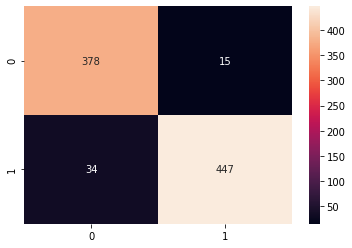

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_LinearKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_LinearKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_LinearKernel)

sns.heatmap(cm,annot=True,fmt='g')

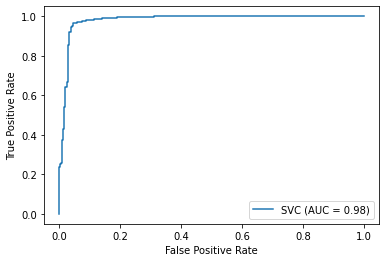

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(SVM_LinearKernel, Test_X, Test_Y) 
plt.show()

## **2) Polynomial Kernel**
1. I have used the Polynomial Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_PolyKernel = svm.SVC(C=1.0, kernel='poly', degree=3)
SVM_PolyKernel.fit(Train_X,Train_Y)

predictions_SVM_PolyKernel = SVM_PolyKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_occ_poly= accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100)

SVM Accuracy Score ->  96.10983981693364


Confusion matrix ->
[[377  16]
 [ 18 463]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       393
           1       0.97      0.96      0.96       481

    accuracy                           0.96       874
   macro avg       0.96      0.96      0.96       874
weighted avg       0.96      0.96      0.96       874



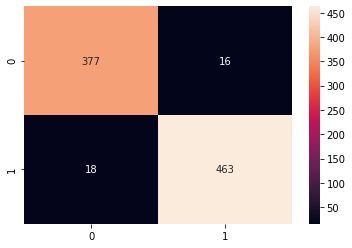

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_PolyKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_PolyKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_PolyKernel)

sns.heatmap(cm,annot=True,fmt='g')

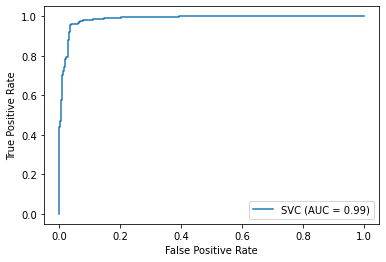

In [ ]:
metrics.plot_roc_curve(SVM_PolyKernel, Test_X, Test_Y)  
plt.show()

## **3) Sigmoid Kernel**
1. I have used the Sigmoid Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_SigmoidKernel = svm.SVC(C=1.5, kernel='sigmoid', gamma='auto')
SVM_SigmoidKernel.fit(Train_X,Train_Y)

predictions_SVM_SigmoidKernel = SVM_SigmoidKernel.predict(Test_X)

In [ ]:
from sklearn.metrics import accuracy_score
acc_Sigmoid_occ = accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100)

SVM Accuracy Score ->  55.034324942791756


Confusion matrix ->
[[  0 393]
 [  0 481]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       393
           1       0.55      1.00      0.71       481

    accuracy                           0.55       874
   macro avg       0.28      0.50      0.35       874
weighted avg       0.30      0.55      0.39       874



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


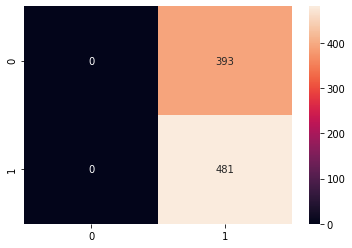

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_SigmoidKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel)

sns.heatmap(cm,annot=True,fmt='g')

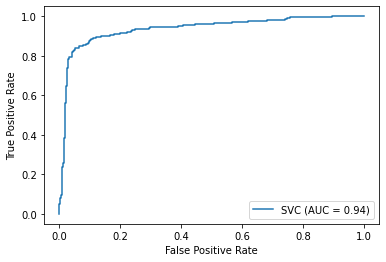

In [ ]:
metrics.plot_roc_curve(SVM_SigmoidKernel, Test_X, Test_Y) 
plt.show()

## **4) SVM RBF Kernel**
1. I have used the RBF Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_rbfKernel = svm.SVC(C=1.5, kernel='rbf', gamma='auto')
SVM_rbfKernel.fit(Train_X,Train_Y)

predictions_SVM_rbfKernel = SVM_rbfKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_rbf_occ = accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100)

SVM Accuracy Score ->  55.034324942791756


Confusion matrix ->
[[  0 393]
 [  0 481]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       393
           1       0.55      1.00      0.71       481

    accuracy                           0.55       874
   macro avg       0.28      0.50      0.35       874
weighted avg       0.30      0.55      0.39       874



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


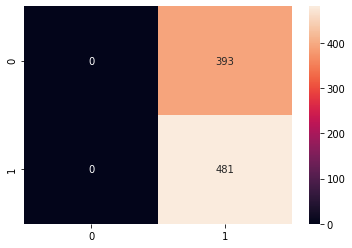

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_rbfKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_rbfKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_rbfKernel)

sns.heatmap(cm,annot=True,fmt='g')

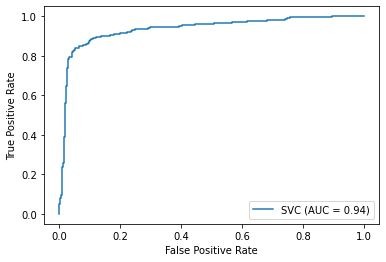

In [ ]:
metrics.plot_roc_curve(SVM_rbfKernel, Test_X, Test_Y) 
plt.show()

## **Boolean occurence Model**
1. For this task I have used the `CountVectorizer` from the sklearn feature extraction.
2. I have fitted and transformed the System Calls Corpus on the CountVectorizer and then converted it into a dataframe. Here, I have choose ngram_range parameter to be (2,2) to generate pair wise features.
3. If the value in the dataframe is greater than 0 than it is replaced by 1 else it is kept as same. 
3. Then  I seperated the features and the labels.
4. Using train_test_split, I split the data into 85% training and 15% testing.


In [ ]:
vectorizer = CountVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(corpus)

df_bool = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

df_bool=np.where(df_bool>=1,1,0)
df_bool = pd.DataFrame(df_bool, columns = cols[1:])
df_bool['Document Name'] = df['Document Name']
cols = df_bool.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_bool = df_bool[cols]

df_bool

,Document Name,_llseek _llseek,_llseek clock_gettime,_llseek close,_llseek faccessat,_llseek fcntl64,_llseek fstat64,_llseek fstatat64,_llseek ftruncate64,_llseek futex,_llseek madvise,_llseek mmap2,_llseek mprotect,_llseek openat,_llseek read,_llseek write,bind fcntl,bind getsockname,bind ppoll,bind setsockopt,bind socket,capget futex,clock_gettime _llseek,clock_gettime clock_gettime,clock_gettime clone,clock_gettime close,clock_gettime dup,clock_gettime epoll_ctl,clock_gettime epoll_pwait,clock_gettime faccessat,clock_gettime fchmodat,clock_gettime fcntl64,clock_gettime fstat,clock_gettime fstat64,clock_gettime fstatat64,clock_gettime futex,clock_gettime getcwd,clock_gettime getdents64,clock_gettime getppid,clock_gettime getpriority,...,writev getpriority,writev getrlimit,writev getsockname,writev getsockopt,writev gettid,writev gettimeofday,writev getuid,writev getuid32,writev ioctl,writev lseek,writev madvise,writev mkdirat,writev mmap,writev mmap2,writev mprotect,writev munmap,writev newfstatat,writev openat,writev pipe2,writev prctl,writev pread,writev pread64,writev read,writev readlinkat,writev recvfrom,writev renameat,writev rt_sigprocmask,writev rt_sigreturn,writev sched_yield,writev sendmsg,writev sendto,writev setsockopt,writev shutdown,writev socket,writev socketpair,writev statfs,writev statfs64,writev unlinkat,writev write,writev writev
0,com.framentos.fantamatic.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1
1,com.allaboutnews.calcionotizie.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
2,com.arabdev.dawae.lkalf.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3,com.appspot.scruffapp.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,com.exatools.laserlevel.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,16aac4e2964bc8ff75ad07f64ce8991f433aaebe6e790e...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
5818,89aa148a81e8aacf75c48c673cf0537a284d8bfa33ea78...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
5819,4d5ff01cc5f88bdb5c894c65b60bbb913a11422cea98a0...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
5820,16ab51f7c85b01e5cc3f6cd3747bd0a4a70cc6d9d8b8f3...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1


In [ ]:
from sklearn import preprocessing
df_bool = df_bool.drop(['Document Name'],axis=1)
X = df_bool
Y = df['Label']


In [ ]:
from sklearn import model_selection, svm

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,df['Label'],test_size=0.15,random_state=42)

##1)Linear Kernel
1. I have used the Linear Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_LinearKernel = svm.SVC(C=1.8, kernel='linear', gamma='auto')
SVM_LinearKernel.fit(Train_X,Train_Y)

predictions_SVM_LinearKernel = SVM_LinearKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_linear_bool = accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100)

SVM Accuracy Score ->  97.1395881006865


Confusion matrix ->
[[373  20]
 [ 14 467]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       393
           1       0.96      0.97      0.96       481

    accuracy                           0.96       874
   macro avg       0.96      0.96      0.96       874
weighted avg       0.96      0.96      0.96       874



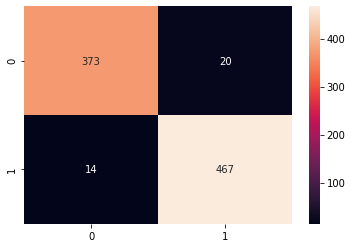

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_LinearKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_LinearKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_LinearKernel)

sns.heatmap(cm,annot=True,fmt='g')

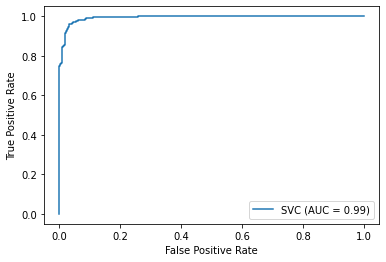

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(SVM_LinearKernel, Test_X, Test_Y) 
plt.show()

## **2) Polynomial Kernel**
1. I have used the Polynomial Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_PolyKernel = svm.SVC(C=1.0, kernel='poly', degree=3)
SVM_PolyKernel.fit(Train_X,Train_Y)

predictions_SVM_PolyKernel = SVM_PolyKernel.predict(Test_X)


In [ ]:
from sklearn.metrics import accuracy_score
acc_poly_bool = accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100)

SVM Accuracy Score ->  97.25400457665904


Confusion matrix ->
[[373  20]
 [  3 478]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       393
           1       0.96      0.99      0.98       481

    accuracy                           0.97       874
   macro avg       0.98      0.97      0.97       874
weighted avg       0.97      0.97      0.97       874



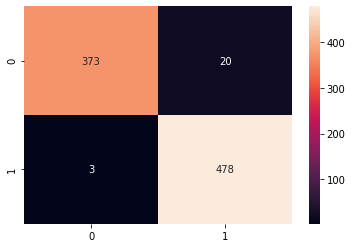

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_PolyKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_PolyKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_PolyKernel)

sns.heatmap(cm,annot=True,fmt='g')

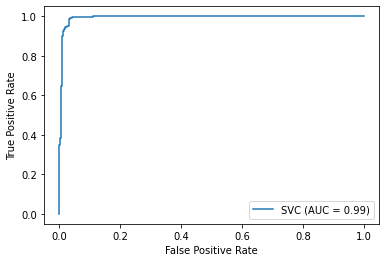

In [ ]:
metrics.plot_roc_curve(SVM_PolyKernel, Test_X, Test_Y)  
plt.show()

## **3) Sigmoid Kernel**
1. I have used the Polynomial Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_SigmoidKernel = svm.SVC(C=1.5, kernel='sigmoid', gamma='auto')
SVM_SigmoidKernel.fit(Train_X,Train_Y)

predictions_SVM_SigmoidKernel = SVM_SigmoidKernel.predict(Test_X)

In [ ]:
from sklearn.metrics import accuracy_score
acc_sigmoid_bool = accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100)

SVM Accuracy Score ->  97.1395881006865


Confusion matrix ->
[[370  23]
 [  6 475]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       393
           1       0.95      0.99      0.97       481

    accuracy                           0.97       874
   macro avg       0.97      0.96      0.97       874
weighted avg       0.97      0.97      0.97       874



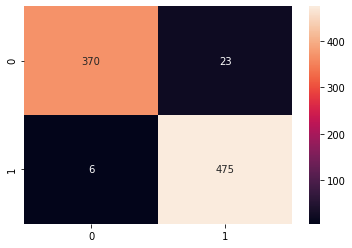

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_SigmoidKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel)

sns.heatmap(cm,annot=True,fmt='g')

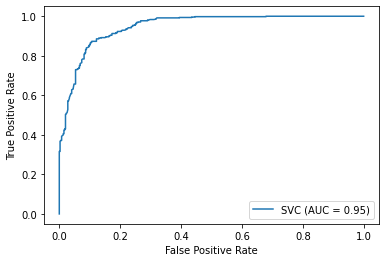

In [ ]:
metrics.plot_roc_curve(SVM_SigmoidKernel, Test_X, Test_Y) 
plt.show()

## **4) SVM RBF Kernel**
1. I have used the RBF Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_rbfKernel = svm.SVC(C=1.5, kernel='rbf', gamma='auto')
SVM_rbfKernel.fit(Train_X,Train_Y)

predictions_SVM_rbfKernel = SVM_rbfKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_rbf_bool = accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100)

SVM Accuracy Score ->  55.034324942791756


Confusion matrix ->
[[374  19]
 [  5 476]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       393
           1       0.96      0.99      0.98       481

    accuracy                           0.97       874
   macro avg       0.97      0.97      0.97       874
weighted avg       0.97      0.97      0.97       874



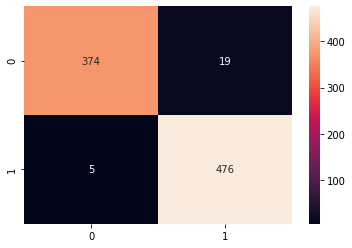

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_rbfKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_rbfKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_rbfKernel)

sns.heatmap(cm,annot=True,fmt='g')

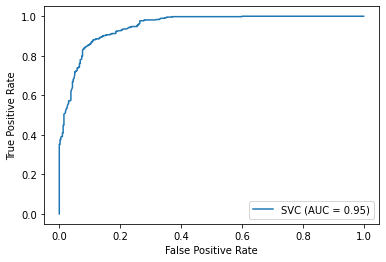

In [ ]:
metrics.plot_roc_curve(SVM_rbfKernel, Test_X, Test_Y) 
plt.show()

## **Term Frequency Inverse Doc Frequency Vectorization Tf-Idf Model**

1. For this task I have used the `TfidfVectorizer` from the sklearn feature extraction.
2. I have fitted and transformed the System Calls Corpus on the TfidfVectorizer and then converted it into a dataframe. Here, I have choose ngram_range parameter to be (2,2) to generate pair wise features.
3. I have also displayed the vocubalary obtained by fitting and transforming the corpus. 
3. Then  I seperated the features and the labels.
4. Using train_test_split, I split the data into 85% training and 15% testing.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word',ngram_range=(2,2))
X = vectorizer.fit_transform(corpus)



In [ ]:
print(X.shape)

(5822, 2425)


In [ ]:
from sklearn import model_selection, svm

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['System Calls'],df['Label'],test_size=0.3,random_state=42)

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
Tfidf_vect.fit(df['System Calls'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)


## **1) Linear Kernel**
1. I have used the Linear Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_LinearKernel = svm.SVC(C=1.0, kernel='linear', gamma='auto')
SVM_LinearKernel.fit(Train_X_Tfidf,Train_Y)

predictions_SVM_LinearKernel = SVM_LinearKernel.predict(Test_X_Tfidf)



In [ ]:
from sklearn.metrics import accuracy_score
acc_linear_tfidf = accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100)

SVM Accuracy Score ->  94.33314253005152


Confusion matrix ->
[[721  43]
 [ 95 888]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       764
           1       0.95      0.90      0.93       983

    accuracy                           0.92      1747
   macro avg       0.92      0.92      0.92      1747
weighted avg       0.92      0.92      0.92      1747



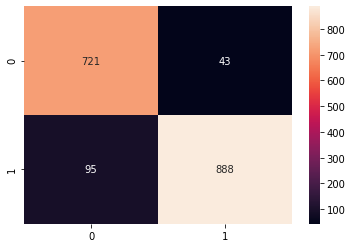

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_LinearKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_LinearKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_LinearKernel)

sns.heatmap(cm,annot=True,fmt='g')

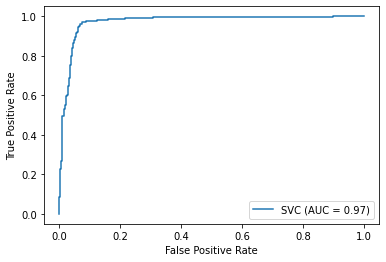

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(SVM_LinearKernel, Test_X_Tfidf, Test_Y) 
plt.show()

## **2) Polynomial Kernel**
1. I have used the Polynomial Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 




In [ ]:
SVM_PolyKernel = svm.SVC(C=1.3, kernel='poly', degree=102)
SVM_PolyKernel.fit(Train_X_Tfidf,Train_Y)

predictions_SVM_PolyKernel = SVM_PolyKernel.predict(Test_X_Tfidf)



In [ ]:
from sklearn.metrics import accuracy_score
acc_poly_bool = accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100)

SVM Accuracy Score ->  89.41041785918718


Confusion matrix ->
[[595 169]
 [ 26 957]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       764
           1       0.85      0.97      0.91       983

    accuracy                           0.89      1747
   macro avg       0.90      0.88      0.88      1747
weighted avg       0.90      0.89      0.89      1747



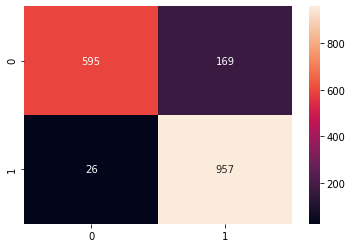

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_PolyKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_PolyKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_PolyKernel)

sns.heatmap(cm,annot=True,fmt='g')

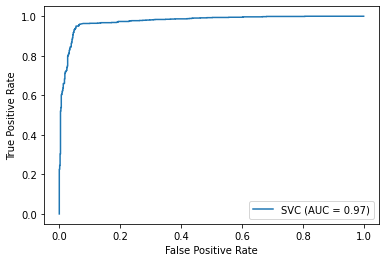

In [ ]:
metrics.plot_roc_curve(SVM_PolyKernel, Test_X_Tfidf, Test_Y)  
plt.show()

## **3) Sigmoid Kernel**
1. I have used the Sigmoid Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_SigmoidKernel = svm.SVC(C=1.5, kernel='sigmoid', gamma=1.6)
SVM_SigmoidKernel.fit(Train_X_Tfidf,Train_Y)

predictions_SVM_SigmoidKernel = SVM_SigmoidKernel.predict(Test_X_Tfidf)

In [ ]:
from sklearn.metrics import accuracy_score
acc_Sigmoid_tfidf = accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100)

SVM Accuracy Score ->  68.40297653119633


Confusion matrix ->
[[484 280]
 [255 728]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       764
           1       0.72      0.74      0.73       983

    accuracy                           0.69      1747
   macro avg       0.69      0.69      0.69      1747
weighted avg       0.69      0.69      0.69      1747



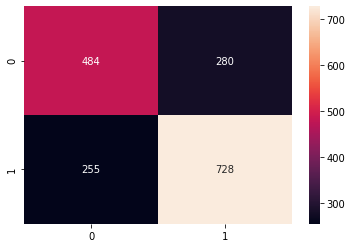

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_SigmoidKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel)

sns.heatmap(cm,annot=True,fmt='g')

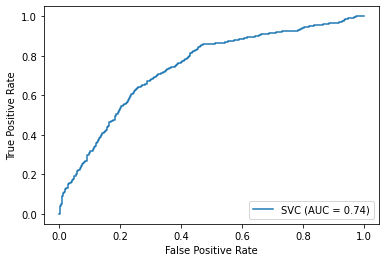

In [ ]:
metrics.plot_roc_curve(SVM_SigmoidKernel, Test_X_Tfidf, Test_Y) 
plt.show()

## 4) SVM RBF Kernel
1. I have used the RBF Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_rbfKernel = svm.SVC(C=3, kernel='rbf', gamma=2)
SVM_rbfKernel.fit(Train_X_Tfidf,Train_Y)

predictions_SVM_rbfKernel = SVM_rbfKernel.predict(Test_X_Tfidf)



In [ ]:
from sklearn.metrics import accuracy_score
acc_rbf_tfidf = accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100)

SVM Accuracy Score ->  95.87864911276473


Confusion matrix ->
[[721  43]
 [ 43 940]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       764
           1       0.96      0.96      0.96       983

    accuracy                           0.95      1747
   macro avg       0.95      0.95      0.95      1747
weighted avg       0.95      0.95      0.95      1747



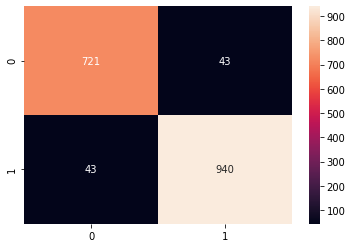

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_rbfKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_rbfKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_rbfKernel)

sns.heatmap(cm,annot=True,fmt='g')

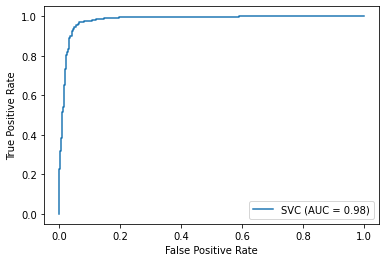

In [ ]:
metrics.plot_roc_curve(SVM_rbfKernel, Test_X_Tfidf, Test_Y) 
plt.show()

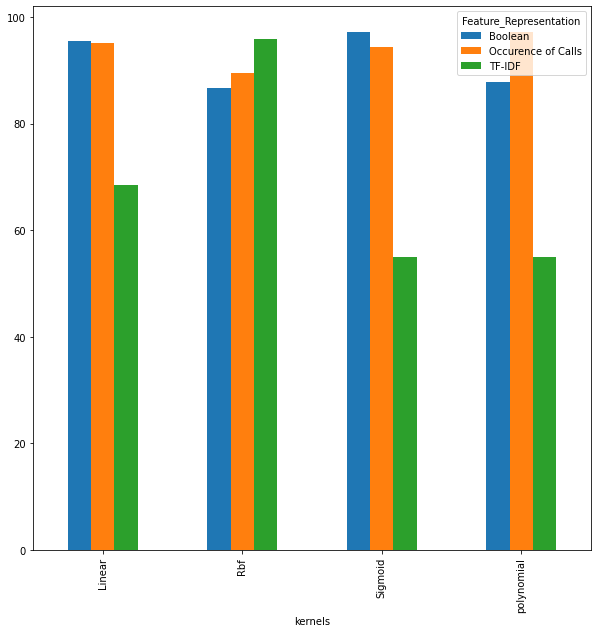

In [ ]:
kernels = ['Linear','polynomial','Sigmoid','Rbf',]
feat_rep = ['Occurence of Calls','Boolean','TF-IDF']
acc = [acc_linear_occ,acc_linear_bool,acc_linear_tfidf,acc_poly_bool,acc_poly_occ,acc_poly_tfidf,acc_sigmoid_bool,acc_sigmoid_occ,acc_Sigmoid_tfidf,acc_rbf_occ,acc_rbf_bool,acc_rbf_tfidf]
x = []
count = 0
for i in range(3):
  for j in range(4):
    x.append([kernels[(j+4)%4], feat_rep[i], acc[count]])
    count += 1
f = pd.DataFrame(x,columns=['kernels', 'Feature_Representation', 'Accuracy'])
f.pivot('kernels','Feature_Representation','Accuracy').plot(kind='bar',figsize=(10,10))


# **3 Sequence Model(Trigram Model)**




## Occurence of Calls Model (Bag of Words)  
1. For this task I have used the `CountVectorizer` from the sklearn feature extraction. 
2. I have fitted and transformed the System Calls Corpus on the CountVectorizer and then converted it into a dataframe. Here, I have choose ngram_range parameter to be (3,3) to generate triplet pair wise features.  
3. Then First I seperated the features and the labels follwed by normalization of the Features. 
4. Using train_test_split, I split the data into 85% training and 15% testing.   

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = df['System Calls']
print(corpus)


0       ioctl pread rt_sigprocmask rt_sigprocmask rt_s...
1       dup fcntl close epoll_ctl ioctl ioctl getuid e...
2       futex ioctl epoll_pwait read recvfrom writev s...
3       read writev write read read write read read re...
4       read read ioctl ioctl writev futex ioctl ioctl...
                              ...                        
5817    newfstatat ioctl ioctl getuid newfstatat newfs...
5818    recvfrom recvfrom writev sendto getuid epoll_p...
5819    dup fcntl close epoll_ctl ioctl ioctl getuid e...
5820    ioctl ioctl faccessat mprotect mprotect mprote...
5821    getuid epoll_pwait getuid epoll_pwait read new...
Name: System Calls, Length: 5822, dtype: object


In [ ]:
vectorizer = CountVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)



In [ ]:
df_bag_words = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

df_bag_words['Document Name'] = df['Document Name']
cols = df_bag_words.columns.tolist()

cols = cols[-1:] + cols[:-1]
df_bag_words = df_bag_words[cols]
df_bag_words

,Document Name,_llseek _llseek _llseek,_llseek _llseek clock_gettime,_llseek _llseek close,_llseek _llseek fcntl64,_llseek _llseek futex,_llseek _llseek madvise,_llseek _llseek mmap2,_llseek _llseek read,_llseek _llseek write,_llseek clock_gettime _llseek,_llseek clock_gettime clock_gettime,_llseek clock_gettime writev,_llseek close fcntl64,_llseek close fstatat64,_llseek close mprotect,_llseek close openat,_llseek close renameat,_llseek close unlinkat,_llseek close write,_llseek faccessat openat,_llseek fcntl64 close,_llseek fcntl64 fcntl64,_llseek fcntl64 munmap,_llseek fcntl64 pread64,_llseek fstat64 fcntl64,_llseek fstat64 fstat64,_llseek fstatat64 fstatat64,_llseek ftruncate64 _llseek,_llseek futex _llseek,_llseek madvise fcntl64,_llseek madvise pread64,_llseek mmap2 clock_gettime,_llseek mmap2 fcntl64,_llseek mmap2 madvise,_llseek mmap2 munmap,_llseek mmap2 openat,_llseek mmap2 pread64,_llseek mprotect mprotect,_llseek openat read,...,writev writev fcntl,writev writev flock,writev writev fstat,writev writev futex,writev writev getdents64,writev writev getpriority,writev writev getrlimit,writev writev getsockname,writev writev gettid,writev writev gettimeofday,writev writev getuid,writev writev getuid32,writev writev ioctl,writev writev lseek,writev writev madvise,writev writev mkdirat,writev writev mmap,writev writev mmap2,writev writev mprotect,writev writev munmap,writev writev newfstatat,writev writev openat,writev writev pipe2,writev writev prctl,writev writev pread,writev writev pread64,writev writev read,writev writev recvfrom,writev writev renameat,writev writev rt_sigprocmask,writev writev rt_sigreturn,writev writev sched_yield,writev writev sendmsg,writev writev sendto,writev writev setsockopt,writev writev socket,writev writev socketpair,writev writev statfs,writev writev write,writev writev writev
0,com.framentos.fantamatic.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0,4,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,2,0,0,0,0,0,38,0,0,0,0,0,171
1,com.allaboutnews.calcionotizie.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0,1,0,6,0,0,0,0,0,4,0,2,1,0,0,0,0,0,16,0,0,0,0,0,52,0,0,0,0,8,308
2,com.arabdev.dawae.lkalf.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,74,0,0,0,0,3,395
3,com.appspot.scruffapp.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,com.exatools.laserlevel.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,16aac4e2964bc8ff75ad07f64ce8991f433aaebe6e790e...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,45,0,0,0,0,0,168
5818,89aa148a81e8aacf75c48c673cf0537a284d8bfa33ea78...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,10,0,0,0,0,0,45
5819,4d5ff01cc5f88bdb5c894c65b60bbb913a11422cea98a0...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,37,0,0,0,0,0,221
5820,16ab51f7c85b01e5cc3f6cd3747bd0a4a70cc6d9d8b8f3...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
from sklearn import preprocessing
df_bag_words = df_bag_words.drop(['Document Name'],axis=1)
X = df_bag_words
Y = df['Label']
X = preprocessing.normalize(X)
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05121796],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00134176,
        0.05165776],
       [0.        , 0.        , 0.        , ..., 0.        , 0.0019547 ,
        0.25736924],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14112336],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00154676,
        0.06225721],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05769266]])

In [ ]:
from sklearn import model_selection, svm

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,df['Label'],test_size=0.15,random_state=42)

## **1) Linear Kernel**
1. I have used the Linear Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_LinearKernel = svm.SVC(C=1.5, kernel='linear', gamma='auto')
SVM_LinearKernel.fit(Train_X,Train_Y)

predictions_SVM_LinearKernel = SVM_LinearKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_linear_occ = accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100)

SVM Accuracy Score ->  95.88100686498856


Confusion matrix ->
[[379  14]
 [ 33 448]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       393
           1       0.97      0.93      0.95       481

    accuracy                           0.95       874
   macro avg       0.94      0.95      0.95       874
weighted avg       0.95      0.95      0.95       874



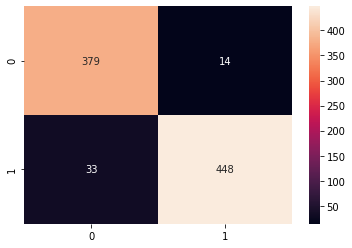

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_LinearKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_LinearKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_LinearKernel)

sns.heatmap(cm,annot=True,fmt='g')

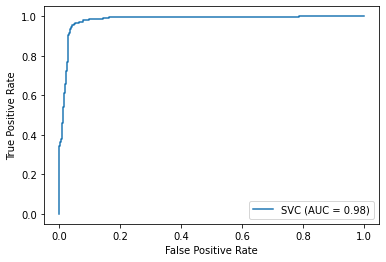

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(SVM_LinearKernel, Test_X, Test_Y) 
plt.show()

## **2) Polynomial Kernel**
1. I have used the Polynomial Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_PolyKernel = svm.SVC(C=1.0, kernel='poly', degree=3)
SVM_PolyKernel.fit(Train_X,Train_Y)

predictions_SVM_PolyKernel = SVM_PolyKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_poly_occ = accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100)

SVM Accuracy Score ->  95.9954233409611


Confusion matrix ->
[[376  17]
 [ 21 460]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       393
           1       0.96      0.96      0.96       481

    accuracy                           0.96       874
   macro avg       0.96      0.96      0.96       874
weighted avg       0.96      0.96      0.96       874



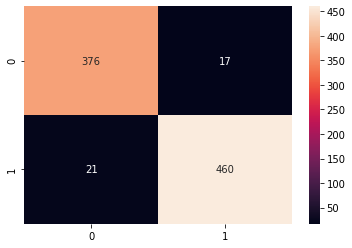

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_PolyKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_PolyKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_PolyKernel)

sns.heatmap(cm,annot=True,fmt='g')

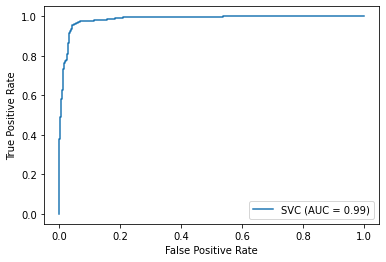

In [ ]:
metrics.plot_roc_curve(SVM_PolyKernel, Test_X, Test_Y)  
plt.show()

## **3) Sigmoid Kernel**
1. I have used the Sigmoid Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_SigmoidKernel = svm.SVC(C=1.5, kernel='sigmoid', gamma='auto')
SVM_SigmoidKernel.fit(Train_X,Train_Y)

predictions_SVM_SigmoidKernel = SVM_SigmoidKernel.predict(Test_X)

In [ ]:
from sklearn.metrics import accuracy_score
acc_sigmoid_occ = accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100)

Confusion matrix ->
[[  0 393]
 [  0 481]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       393
           1       0.55      1.00      0.71       481

    accuracy                           0.55       874
   macro avg       0.28      0.50      0.35       874
weighted avg       0.30      0.55      0.39       874



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


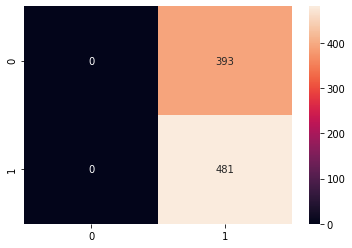

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_SigmoidKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel)

sns.heatmap(cm,annot=True,fmt='g')

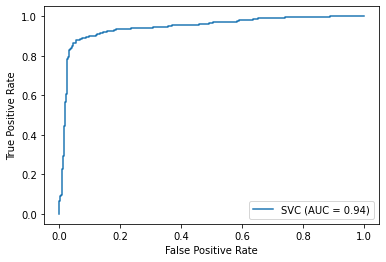

In [ ]:
metrics.plot_roc_curve(SVM_SigmoidKernel, Test_X, Test_Y) 
plt.show()

## **4) SVM RBF Kernel**
1. I have used the RBF Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 



In [ ]:
SVM_rbfKernel = svm.SVC(C=1.5, kernel='rbf', gamma='auto')
SVM_rbfKernel.fit(Train_X,Train_Y)

predictions_SVM_rbfKernel = SVM_rbfKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_rbf_occ = accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100)

SVM Accuracy Score ->  55.034324942791756


Confusion matrix ->
[[  0 393]
 [  0 481]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       393
           1       0.55      1.00      0.71       481

    accuracy                           0.55       874
   macro avg       0.28      0.50      0.35       874
weighted avg       0.30      0.55      0.39       874



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


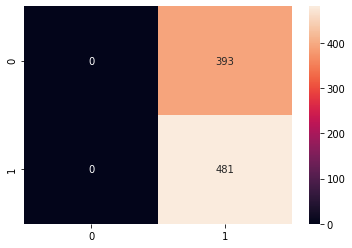

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_rbfKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_rbfKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_rbfKernel)

sns.heatmap(cm,annot=True,fmt='g')

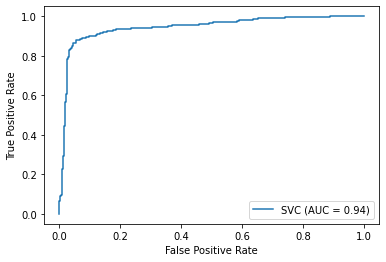

In [ ]:
metrics.plot_roc_curve(SVM_rbfKernel, Test_X, Test_Y) 
plt.show()

## **Boolean occurence Model**
1. For this task I have used the `CountVectorizer` from the sklearn feature extraction.
2. I have fitted and transformed the System Calls Corpus on the CountVectorizer and then converted it into a dataframe. Here, I have choose ngram_range parameter to be (3,3) to generate triplet pair wise features.
3. If the value in the dataframe is greater than 0 than it is replaced by 1 else it is kept as same. 
3. Then  I seperated the features and the labels.
4. Using train_test_split, I split the data into 85% training and 15% testing.


In [ ]:
vectorizer = CountVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)

df_bool = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

df_bool=np.where(df_bool>=1,1,0)
df_bool = pd.DataFrame(df_bool, columns = cols[1:])
df_bool['Document Name'] = df['Document Name']
cols = df_bool.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_bool = df_bool[cols]

df_bool

,Document Name,_llseek _llseek _llseek,_llseek _llseek clock_gettime,_llseek _llseek close,_llseek _llseek fcntl64,_llseek _llseek futex,_llseek _llseek madvise,_llseek _llseek mmap2,_llseek _llseek read,_llseek _llseek write,_llseek clock_gettime _llseek,_llseek clock_gettime clock_gettime,_llseek clock_gettime writev,_llseek close fcntl64,_llseek close fstatat64,_llseek close mprotect,_llseek close openat,_llseek close renameat,_llseek close unlinkat,_llseek close write,_llseek faccessat openat,_llseek fcntl64 close,_llseek fcntl64 fcntl64,_llseek fcntl64 munmap,_llseek fcntl64 pread64,_llseek fstat64 fcntl64,_llseek fstat64 fstat64,_llseek fstatat64 fstatat64,_llseek ftruncate64 _llseek,_llseek futex _llseek,_llseek madvise fcntl64,_llseek madvise pread64,_llseek mmap2 clock_gettime,_llseek mmap2 fcntl64,_llseek mmap2 madvise,_llseek mmap2 munmap,_llseek mmap2 openat,_llseek mmap2 pread64,_llseek mprotect mprotect,_llseek openat read,...,writev writev fcntl,writev writev flock,writev writev fstat,writev writev futex,writev writev getdents64,writev writev getpriority,writev writev getrlimit,writev writev getsockname,writev writev gettid,writev writev gettimeofday,writev writev getuid,writev writev getuid32,writev writev ioctl,writev writev lseek,writev writev madvise,writev writev mkdirat,writev writev mmap,writev writev mmap2,writev writev mprotect,writev writev munmap,writev writev newfstatat,writev writev openat,writev writev pipe2,writev writev prctl,writev writev pread,writev writev pread64,writev writev read,writev writev recvfrom,writev writev renameat,writev writev rt_sigprocmask,writev writev rt_sigreturn,writev writev sched_yield,writev writev sendmsg,writev writev sendto,writev writev setsockopt,writev writev socket,writev writev socketpair,writev writev statfs,writev writev write,writev writev writev
0,com.acnefree.pimpleremoval.tips.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,com.certificauto.evin.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,com.advfn.android.mobile.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
3,com.birdvision.beautymeter.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,com.danlustudios.apps.nightlampmulticolor.apk....,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,f25c2616801987db74c3c96d63cea76f5f6a9a9116842e...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
5818,496029744d37ec8b0ab955a99c782200b1990f46d2c8c9...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
5819,564d484493e4418529e4b6e2979b7896cd228b836193d8...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
5820,fa8beb6e22fdb72513a0ed6a704012683575108978ce77...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
from sklearn import preprocessing
df_bool = df_bool.drop(['Document Name'],axis=1)
X = df_bool
Y = df['Label']


In [ ]:
from sklearn import model_selection, svm

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,df['Label'],test_size=0.15,random_state=42)

##1)Linear Kernel
1. I have used the Linear Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_LinearKernel = svm.SVC(C=1.8, kernel='linear', gamma='auto')
SVM_LinearKernel.fit(Train_X,Train_Y)

predictions_SVM_LinearKernel = SVM_LinearKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_linear_bool = accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100)

SVM Accuracy Score ->  96.10983981693364


Confusion matrix ->
[[373  20]
 [ 14 467]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       393
           1       0.96      0.97      0.96       481

    accuracy                           0.96       874
   macro avg       0.96      0.96      0.96       874
weighted avg       0.96      0.96      0.96       874



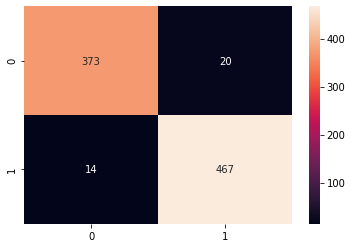

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_LinearKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_LinearKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_LinearKernel)

sns.heatmap(cm,annot=True,fmt='g')

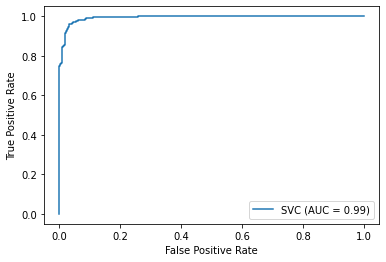

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(SVM_LinearKernel, Test_X, Test_Y) 
plt.show()

## **2) Polynomial Kernel**
1. I have used the Polynomial Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_PolyKernel = svm.SVC(C=1.0, kernel='poly', degree=3)
SVM_PolyKernel.fit(Train_X,Train_Y)

predictions_SVM_PolyKernel = SVM_PolyKernel.predict(Test_X)


In [ ]:
from sklearn.metrics import accuracy_score
acc_poly_bool = accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100)

SVM Accuracy Score ->  95.65217391304348


Confusion matrix ->
[[373  20]
 [  3 478]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       393
           1       0.96      0.99      0.98       481

    accuracy                           0.97       874
   macro avg       0.98      0.97      0.97       874
weighted avg       0.97      0.97      0.97       874



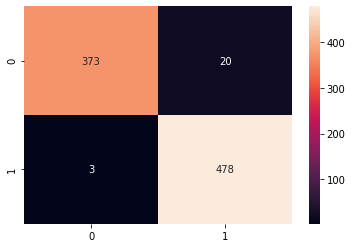

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_PolyKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_PolyKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_PolyKernel)

sns.heatmap(cm,annot=True,fmt='g')

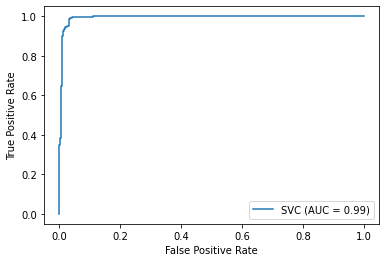

In [ ]:
metrics.plot_roc_curve(SVM_PolyKernel, Test_X, Test_Y)  
plt.show()

## **3) Sigmoid Kernel**
1. I have used the Sigmoid Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_SigmoidKernel = svm.SVC(C=1.5, kernel='sigmoid', gamma='auto')
SVM_SigmoidKernel.fit(Train_X,Train_Y)

predictions_SVM_SigmoidKernel = SVM_SigmoidKernel.predict(Test_X)

In [ ]:
from sklearn.metrics import accuracy_score
acc_sigmoid_bool = accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100)

SVM Accuracy Score ->  96.68192219679635


Confusion matrix ->
[[370  23]
 [  6 475]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       393
           1       0.95      0.99      0.97       481

    accuracy                           0.97       874
   macro avg       0.97      0.96      0.97       874
weighted avg       0.97      0.97      0.97       874



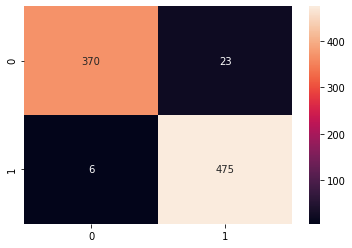

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_SigmoidKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel)

sns.heatmap(cm,annot=True,fmt='g')

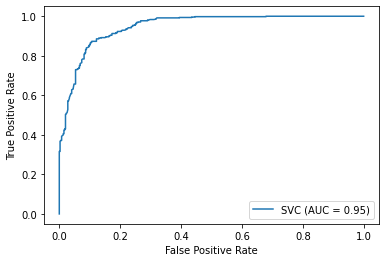

In [ ]:
metrics.plot_roc_curve(SVM_SigmoidKernel, Test_X, Test_Y) 
plt.show()

## **4) SVM RBF Kernel**
1. I have used the RBF Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_rbfKernel = svm.SVC(C=1.5, kernel='rbf', gamma='auto')
SVM_rbfKernel.fit(Train_X,Train_Y)

predictions_SVM_rbfKernel = SVM_rbfKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_rbf_bool = accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100)

SVM Accuracy Score ->  97.25400457665904


Confusion matrix ->
[[374  19]
 [  5 476]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       393
           1       0.96      0.99      0.98       481

    accuracy                           0.97       874
   macro avg       0.97      0.97      0.97       874
weighted avg       0.97      0.97      0.97       874



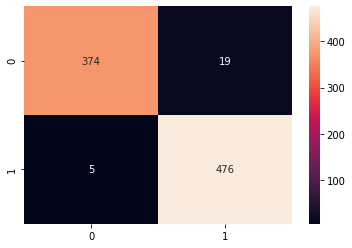

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_rbfKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_rbfKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_rbfKernel)

sns.heatmap(cm,annot=True,fmt='g')

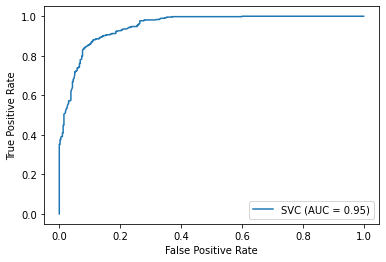

In [ ]:
metrics.plot_roc_curve(SVM_rbfKernel, Test_X, Test_Y) 
plt.show()

## **Term Frequency Inverse Doc Frequency Vectorization Tf-Idf Model**

1. For this task I have used the `TfidfVectorizer` from the sklearn feature extraction.
2. I have fitted and transformed the System Calls Corpus on the TfidfVectorizer and then converted it into a dataframe. Here, I have choose ngram_range parameter to be (3,3) to generate triplet pair wise features.
3. I have also displayed the vocubalary obtained by fitting and transforming the corpus. 
3. Then  I seperated the features and the labels.
4. Using train_test_split, I split the data into 85% training and 15% testing.


In [ ]:
vectorizer = CountVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df['System Calls']
print(corpus)


0       read write read read write read read writev wr...
1       mprotect mprotect mprotect mprotect ioctl ioct...
2       futex ioctl ioctl write ioctl write getuid epo...
3       ioctl ioctl write ioctl getuid epoll_pwait rea...
4       futex ioctl recvfrom recvfrom writev sendto ge...
                              ...                        
5817    epoll_pwait recvfrom writev mprotect mprotect ...
5818    ioctl ioctl ioctl faccessat mprotect mprotect ...
5819    getuid epoll_pwait recvfrom write write getuid...
5820    ioctl dup fcntl close epoll_ctl getuid epoll_p...
5821    newfstatat ioctl ioctl getuid ioctl ioctl newf...
Name: System Calls, Length: 5822, dtype: object


In [ ]:
vectorizer = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word',ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)



In [ ]:
print(X.shape)

(5822, 23331)


In [ ]:
from sklearn import model_selection, svm

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['System Calls'],df['Label'],test_size=0.3,random_state=42)

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000,ngram_range=(3,3))
Tfidf_vect.fit(df['System Calls'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

## **1) Linear Kernel**
1. I have used the Linear Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_LinearKernel = svm.SVC(C=1.0, kernel='linear', gamma='auto')
SVM_LinearKernel.fit(Train_X_Tfidf,Train_Y)

predictions_SVM_LinearKernel = SVM_LinearKernel.predict(Test_X_Tfidf)



In [ ]:
from sklearn.metrics import accuracy_score
acc_linear_tfidf = accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_LinearKernel, Test_Y)*100)

SVM Accuracy Score ->  93.58900973096738


Confusion matrix ->
[[725  39]
 [ 73 910]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       764
           1       0.96      0.93      0.94       983

    accuracy                           0.94      1747
   macro avg       0.93      0.94      0.94      1747
weighted avg       0.94      0.94      0.94      1747



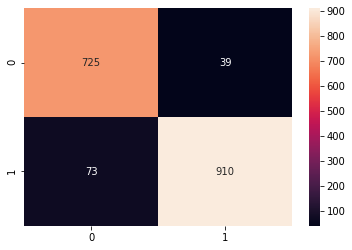

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_LinearKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_LinearKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_LinearKernel)

sns.heatmap(cm,annot=True,fmt='g')

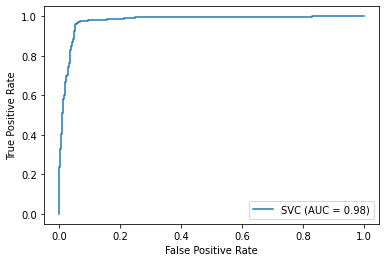

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(SVM_LinearKernel, Test_X_Tfidf, Test_Y) 
plt.show()

## **2) Polynomial Kernel**
1. I have used the Polynomial Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 



In [ ]:
SVM_PolyKernel = svm.SVC(C=1.3, kernel='poly', degree=102)
SVM_PolyKernel.fit(Train_X_Tfidf,Train_Y)

predictions_SVM_PolyKernel = SVM_PolyKernel.predict(Test_X_Tfidf)



In [ ]:
from sklearn.metrics import accuracy_score
acc__bool = accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_PolyKernel, Test_Y)*100)

SVM Accuracy Score ->  83.05666857469949


Confusion matrix ->
[[492 272]
 [ 24 959]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.95      0.64      0.77       764
           1       0.78      0.98      0.87       983

    accuracy                           0.83      1747
   macro avg       0.87      0.81      0.82      1747
weighted avg       0.86      0.83      0.82      1747



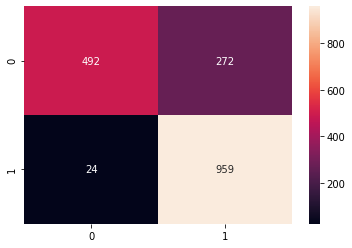

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_PolyKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_PolyKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_PolyKernel)

sns.heatmap(cm,annot=True,fmt='g')

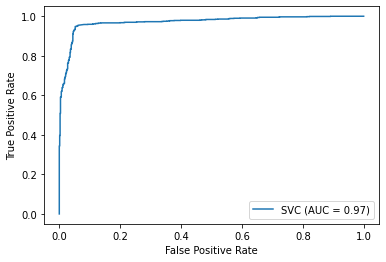

In [ ]:
metrics.plot_roc_curve(SVM_PolyKernel, Test_X_Tfidf, Test_Y)  
plt.show()

## **3) Sigmoid Kernel**
1. I have used the Sigmoid Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_SigmoidKernel = svm.SVC(C=2, kernel='sigmoid', gamma='auto')
SVM_SigmoidKernel.fit(Train_X_Tfidf,Train_Y)

predictions_SVM_SigmoidKernel = SVM_SigmoidKernel.predict(Test_X_Tfidf)

In [ ]:
from sklearn.metrics import accuracy_score
acc_Sigmoid_tfidf = accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_SigmoidKernel, Test_Y)*100)

SVM Accuracy Score ->  56.26788780767029


Confusion matrix ->
[[  0 764]
 [  0 983]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       764
           1       0.56      1.00      0.72       983

    accuracy                           0.56      1747
   macro avg       0.28      0.50      0.36      1747
weighted avg       0.32      0.56      0.41      1747



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


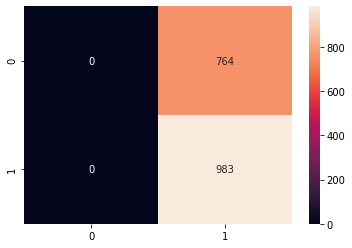

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_SigmoidKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_SigmoidKernel)

sns.heatmap(cm,annot=True,fmt='g')

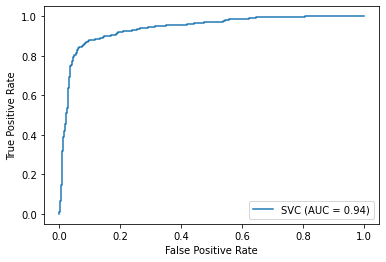

In [ ]:
metrics.plot_roc_curve(SVM_SigmoidKernel, Test_X_Tfidf, Test_Y) 
plt.show()

## **4) SVM RBF Kernel**
1. I have used the RBF Kernel from the SVM to fit the training data.
2. Then, I  have calculated the accuracy on the test dataset.
3. Then, I have calculated the precision,recall f1_score,Confusion Matrix and presented them in the Classification Report.
4. Also I have plotted the heatmap plot of the Confusion Matrix.
5. Finally, I have plotted the ROC curve to obtain the evaluate classifier output quality. 

In [ ]:
SVM_rbfKernel = svm.SVC(C=1.0, kernel='rbf', gamma='auto')
SVM_rbfKernel.fit(Train_X_Tfidf,Train_Y)

predictions_SVM_rbfKernel = SVM_rbfKernel.predict(Test_X_Tfidf)



In [ ]:
from sklearn.metrics import accuracy_score
acc_rbf_tfidf = accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100)

SVM Accuracy Score ->  56.26788780767029


Confusion matrix ->
[[  0 764]
 [  0 983]]
Classification Report ->
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       764
           1       0.56      1.00      0.72       983

    accuracy                           0.56      1747
   macro avg       0.28      0.50      0.36      1747
weighted avg       0.32      0.56      0.41      1747



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


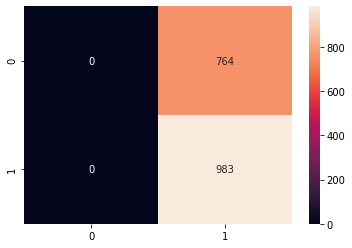

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_rbfKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_rbfKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_rbfKernel)

sns.heatmap(cm,annot=True,fmt='g')

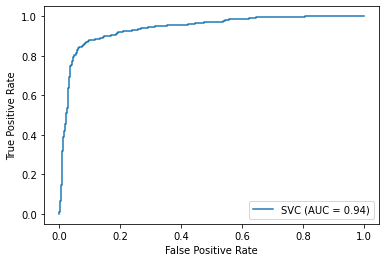

In [ ]:
metrics.plot_roc_curve(SVM_rbfKernel, Test_X_Tfidf, Test_Y) 
plt.show()

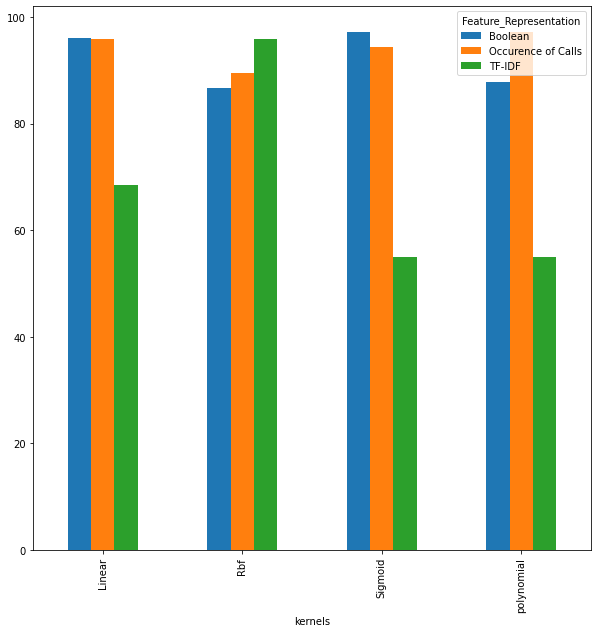

In [ ]:
kernels = ['Linear','polynomial','Sigmoid','Rbf',]
feat_rep = ['Occurence of Calls','Boolean','TF-IDF']
acc = [acc_linear_occ,acc_linear_bool,acc_linear_tfidf,acc_poly_bool,acc_poly_occ,acc_poly_tfidf,acc_sigmoid_bool,acc_sigmoid_occ,acc_Sigmoid_tfidf,acc_rbf_occ,acc_rbf_bool,acc_rbf_tfidf]
x = []
count = 0
for i in range(3):
  for j in range(4):
    x.append([kernels[(j+4)%4], feat_rep[i], acc[count]])
    count += 1
f = pd.DataFrame(x,columns=['kernels', 'Feature_Representation', 'Accuracy'])
f.pivot('kernels','Feature_Representation','Accuracy').plot(kind='bar',figsize=(10,10))


# **Question 3 Feature Selection**
Feature selection is a technique to select the features in the data that contribute most to the output.

## **2 Sequence Bi-Gram Model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
Tfidf_vect.fit(df['System Calls'])
Bigram_model = Tfidf_vect.transform(df['System Calls'])
columns_bigram = list(Tfidf_vect.vocabulary_.keys())


### **1) Univariate Selection Select K Best**
1. Feature Selection library in sklearn provide us a method to select K best features from the given N features in our dataset where k<=N.
2. I have chosen K=10 here and then printed the top 10 features along with their values in Sorted Reverse Order.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

X = Bigram_model
Y = df['Label']

test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X, Y)

set_printoptions(precision=3)
print(fit.scores_)
v = [i+1 for i in range(0,len(fit.scores_))]
features = fit.transform(X)

t = list(zip(fit.scores_,columns_bigram))
t.sort(reverse=True)
print("Top 10 features are->")
for i in range(0,10):
    print(t[i])


[57.904  2.698  4.756 ...  1.222 12.488 24.203]
Top 10 features are->
(4893.912830349372, 'socket getsockname')
(4365.8267936035545, 'madvise fstat64')
(3752.7848684037513, 'write socket')
(3641.562001818637, 'futex tgkill')
(3446.057521771463, 'sendto prctl')
(3232.579567961743, 'sendmsg close')
(1680.2681556614577, 'ioctl mmap2')
(1634.1518558787423, 'prctl epoll_ctl')
(1585.7546650229172, 'epoll_ctl clone')
(1521.3335502287466, 'close msync')


### 2) Recursive Feature Elimination

1. The Recursive Feature Elimination recursively removes the features and builds the model on remaining features.
2. Here I have calculted the top 3 features. In the fit support vector the values which are True will yeild the corresponding features vectors. 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = Bigram_model
Y = df['Label']

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False False False ... False False False]
Feature Ranking: [ 865 2299 2159 ... 1320  216  335]


In [ ]:
print("Top 3 features are->")
for ind,value in enumerate(fit.support_):
    
    if value==True:
        
        print(columns_bigram[ind])

Top 3 features are->
geteuid32 openat
close clone
socket getsockname


### 3) Principal Component Analysis
1. It is a data reduction technique. Using PCA we can change the number of dimension of the given Dataframe and Compress it.
2. Since the Matrix is Sparse is nature which contains 0's very much. Hence I have used Sparse PCA Technique.
3. I have reduced the dimensions to 10.

In [ ]:
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp
X = Bigram_model
Y = df['Label']

pca = TruncatedSVD(n_components=10)
fit = pca.fit(X)
# summarize components

print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.116 0.163 0.156 0.125 0.102 0.08  0.043 0.026 0.023 0.017]
[[ 1.041e-05  8.599e-09  2.694e-08 ...  3.982e-07  8.329e-03  1.183e-01]
 [-2.892e-05 -3.398e-08 -1.212e-07 ...  3.348e-07  2.467e-03 -2.456e-02]
 [-6.761e-05 -7.697e-08 -2.228e-07 ...  3.346e-08 -2.133e-03 -9.129e-03]
 ...
 [ 1.971e-05  4.586e-08  7.417e-08 ... -1.382e-06 -2.917e-03 -3.538e-02]
 [-1.159e-06 -3.557e-09  9.391e-08 ...  7.214e-06  4.427e-03  1.527e-01]
 [-5.117e-06  4.219e-09 -1.305e-07 ...  7.928e-06  1.166e-02  6.446e-01]]


### **4) Feature Importance**
1. It works on Decision Tree Classifier and tries to find a path to reach the leaf node(output) label in shortest path.
2. I have plot the top 30 features graph along with there importance values. 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
X = Bigram_model
Y = df['Label']
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

t = list(zip(model.feature_importances_,columns_bigram))
t.sort(reverse=True)
print("Top 10 features are->")
for i in range(0,10):
    print(t[i])
feature, value = zip(*t)

[0.    0.    0.    ... 0.    0.001 0.001]
Top 10 features are->
(0.09275419489173387, 'socket getsockname')
(0.049603310577243445, 'sendto prctl')
(0.04252242692215643, 'close msync')
(0.03715043995981798, 'futex tgkill')
(0.029695383565696343, 'getsockopt close')
(0.02694984767769847, 'munmap unlinkat')
(0.025828238132404917, 'sendto rt_sigprocmask')
(0.024571425734382778, '_llseek faccessat')
(0.02398746184701725, 'write socket')
(0.017956065799482494, 'mmap msync')


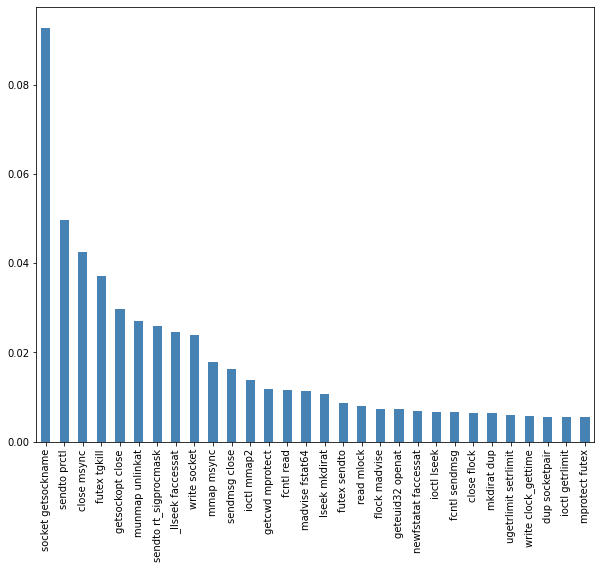

In [ ]:
import pandas as pd
pd.Series(feature[0:30], index=value[0:30]).plot.bar(color='steelblue', figsize=(10,8))

### **5) Lasso Regression**
1. It works on the regularization technique and supress the values which are irrevalent for the model.
2. It automatically finds out which features are important and which are not.
3. I have plotted the graph of the features and there importance values.

In [ ]:
from sklearn.linear_model import LassoCV
X = Bigram_model
Y = df['Label']
reg = LassoCV()
reg.fit(X, Y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,Y))
coef = pd.Series(reg.coef_,index = columns_bigram)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 84 variables and eliminated the other 2341 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

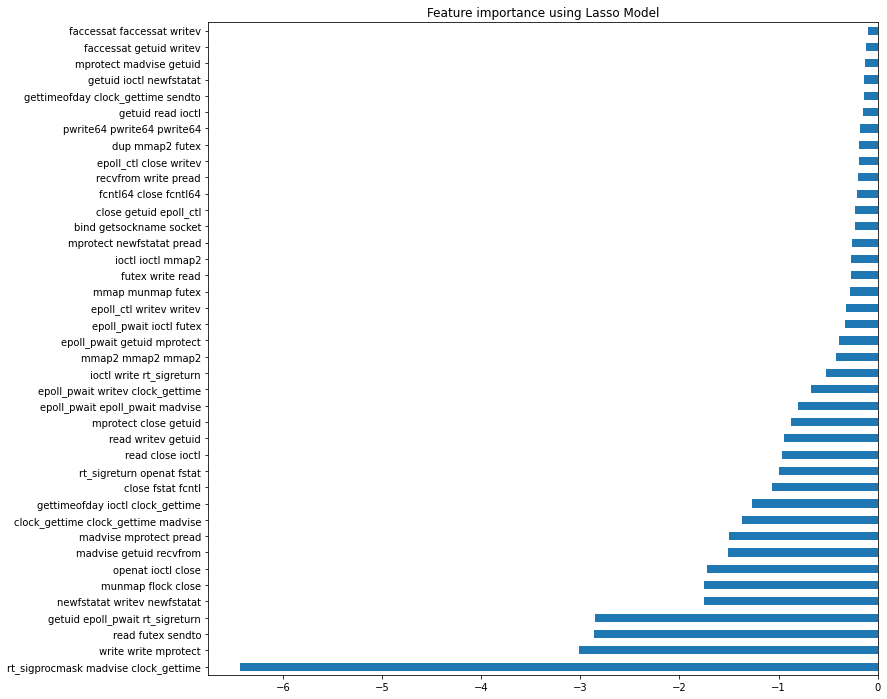

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 12)
imp_coef[0:40].plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### Bi-Gram Model after Feature Selection 
1. I have used tfidf Vectorizer on the dataset and choose the feature importance technique to extract the top 25 features.
2. Then I have fitted the model on this 25 features using SVM rbf kernel and also plotted different metrics and roc curves.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

Tfidf_vect = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
Tfidf_vect.fit(df['System Calls'])
X = Tfidf_vect.transform(df['System Calls'])


df_tfidf = pd.DataFrame(X.toarray(), columns = Tfidf_vect.get_feature_names())
df_tfidf['Document Name'] = df['Document Name']
cols = df_tfidf.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_tfidf = df_tfidf[cols]
df_tfidf

,Document Name,_llseek _llseek,_llseek clock_gettime,_llseek close,_llseek faccessat,_llseek fcntl64,_llseek fstat64,_llseek fstatat64,_llseek ftruncate64,_llseek futex,_llseek madvise,_llseek mmap2,_llseek mprotect,_llseek openat,_llseek read,_llseek write,bind fcntl,bind getsockname,bind ppoll,bind setsockopt,bind socket,capget futex,clock_gettime _llseek,clock_gettime clock_gettime,clock_gettime clone,clock_gettime close,clock_gettime dup,clock_gettime epoll_ctl,clock_gettime epoll_pwait,clock_gettime faccessat,clock_gettime fchmodat,clock_gettime fcntl64,clock_gettime fstat,clock_gettime fstat64,clock_gettime fstatat64,clock_gettime futex,clock_gettime getcwd,clock_gettime getdents64,clock_gettime getppid,clock_gettime getpriority,...,writev getpriority,writev getrlimit,writev getsockname,writev getsockopt,writev gettid,writev gettimeofday,writev getuid,writev getuid32,writev ioctl,writev lseek,writev madvise,writev mkdirat,writev mmap,writev mmap2,writev mprotect,writev munmap,writev newfstatat,writev openat,writev pipe2,writev prctl,writev pread,writev pread64,writev read,writev readlinkat,writev recvfrom,writev renameat,writev rt_sigprocmask,writev rt_sigreturn,writev sched_yield,writev sendmsg,writev sendto,writev setsockopt,writev shutdown,writev socket,writev socketpair,writev statfs,writev statfs64,writev unlinkat,writev write,writev writev
0,com.chinadeals.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004131,0.0,0.021507,0.0,0.000719,0.0,0.000000,0.0,0.000561,0.0,0.000000,0.000000,0.0,0.0,0.001105,0.0,0.0,0.0,0.012714,0.0,0.0,0.000000,0.0,0.0,0.040869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008550,0.097165
1,chat.cristianogratis.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003076,0.0,0.018292,0.0,0.000000,0.0,0.000000,0.0,0.001504,0.0,0.000000,0.000000,0.0,0.0,0.002961,0.0,0.0,0.0,0.008520,0.0,0.0,0.000000,0.0,0.0,0.054214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004584,0.146641
2,com.eterno.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002461,0.0,0.018298,0.0,0.000963,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.026785,0.0,0.0,0.002219,0.0,0.0,0.034663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013755,0.057768
3,com.andromo.dev551559.app531086.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.007407,0.0,0.016861,0.0,0.003051,0.0,0.005238,0.0,0.000953,0.0,0.000000,0.000000,0.0,0.0,0.001407,0.0,0.0,0.0,0.011955,0.0,0.0,0.000000,0.0,0.0,0.027980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005446,0.081086
4,com.blinkslabs.blinkist.android.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.055908,0.0,0.050377,0.0,0.002135,0.0,0.000000,0.0,0.003335,0.0,0.000000,0.002643,0.0,0.0,0.003281,0.0,0.0,0.0,0.016187,0.0,0.0,0.000000,0.0,0.0,0.071856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013970,0.282377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,a0bffc11168c65beb59c326d88f144f0d750634252a507...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

Y = df['Label']
model = ExtraTreesClassifier(n_estimators=25)
model.fit(X, Y)
print(model.feature_importances_)
columns_bigram = list(Tfidf_vect.vocabulary_.keys())
t = list(zip(model.feature_importances_,columns_bigram))
t.sort(reverse=True)
print("Top 25 features are->")
for i in range(0,25):
    print(t[i])
feature, value = zip(*t)


[6.29196254e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 1.02886378e-03 5.22358273e-04]
Top 25 features are->
(0.06176242172638356, 'munmap sendmsg')
(0.03635334797053524, 'fchmodat clone')
(0.032033325662728464, 'socket close')
(0.028838706924471484, 'sendmsg getuid')
(0.027945751975352203, 'getpriority mmap')
(0.023785339925821145, 'epoll_ctl mmap')
(0.0231709984438502, 'openat readlinkat')
(0.013687000438674747, '_llseek ftruncate64')
(0.013121730545612715, 'newfstatat epoll_ctl')
(0.012255898817134198, 'close epoll_pwait')
(0.012028459180002669, 'pwrite64 futex')
(0.011852889976918543, 'fstatat64 munmap')
(0.009020136115007134, 'fcntl getpriority')
(0.00896347676939541, 'getuid getrlimit')
(0.008468358237304179, 'getuid32 rt_sigprocmask')
(0.0084043152710063, 'mmap2 clone')
(0.008248558979586486, 'ioctl epoll_create1')
(0.008241312032274822, 'read faccessat')
(0.007839789420966446, 'rt_sigprocmask fstatat64')
(0.0077875604808221015, 'mmap getrlimit')
(0.007636497839941399,

In [ ]:
z =value[0:25]
col = [i for i in z]
X = df_tfidf.loc[:,col] 
X

,getpriority mmap,sendmsg getuid,fchmodat clone,socket close,openat readlinkat,mmap getrlimit,munmap sendmsg,fcntl64 ftruncate,newfstatat epoll_ctl,rt_sigprocmask fstatat64,epoll_ctl mmap,fstat64 fcntl64,close epoll_pwait,setrlimit epoll_pwait,read rt_sigreturn,futex msync,mmap2 faccessat,getcwd clock_gettime,read faccessat,pwrite64 futex,rt_sigreturn getsockopt,openat epoll_ctl,recvfrom sendmsg,getuid recvfrom,recvfrom gettid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007247,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003414,0.0,0.000894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002081,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012492,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001082,0.0,0.000566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009232,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009227,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004278,0.0
5819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000472,0.0


In [ ]:
from sklearn import model_selection, svm
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,df['Label'],test_size=0.3,random_state=42)

In [ ]:
SVM_rbfKernel = svm.SVC(C=3, kernel='rbf', gamma=2)
SVM_rbfKernel.fit(Train_X,Train_Y)
predictions_SVM_rbfKernel = SVM_rbfKernel.predict(Test_X)

In [ ]:
from sklearn.metrics import accuracy_score
acc_rbf_tfidf = accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100)

SVM Accuracy Score ->  60.618202633085296


Confusion matrix ->
[[ 78 686]
 [  2 981]]
Classification Report ->
              precision    recall  f1-score   support

           B       0.97      0.10      0.18       764
           M       0.59      1.00      0.74       983

    accuracy                           0.61      1747
   macro avg       0.78      0.55      0.46      1747
weighted avg       0.76      0.61      0.50      1747



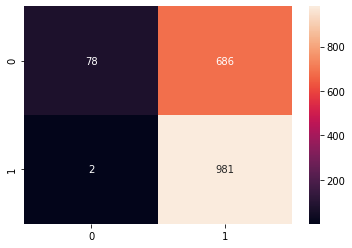

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_rbfKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_rbfKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_rbfKernel)

sns.heatmap(cm,annot=True,fmt='g')

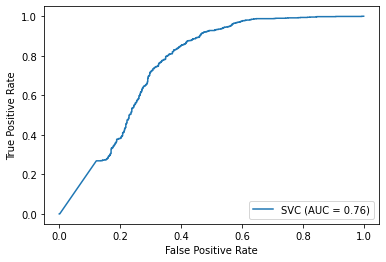

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(SVM_rbfKernel, Test_X, Test_Y) 
plt.show()

## **3 Sequence Tri-Gram Model**

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000,ngram_range=(3,3))
Tfidf_vect.fit(df['System Calls'])
Trigram_model = Tfidf_vect.transform(df['System Calls'])
columns_trigram = list(Tfidf_vect.vocabulary_.keys())

### **1) Univariate Selection Select K Best**
1. Feature Selection library in sklearn provide us a method to select K best features from the given N features in our dataset where k<=N.
2. I have chosen K=10 here and then printed the top 10 features along with their values in Sorted Reverse Order.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

X = Trigram_model
Y = df['Label']


test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X, Y)

set_printoptions(precision=3)
print(fit.scores_)
v = [i+1 for i in range(0,len(fit.scores_))]
features = fit.transform(X)
print(len(fit.scores_))
t = list(zip(fit.scores_,columns_trigram))
t.sort(reverse=True)
print("Top 10 features are->")
print(t[0:10])






[49.983 16.348  1.763 ... 34.366 16.777 18.558]
5000
Top 10 features are->
[(4740.783286893536, 'openat flock ftruncate'), (4393.7374056520575, 'mprotect recvfrom recvfrom'), (4011.5005687579246, 'mprotect epoll_pwait getuid'), (3480.836253849647, 'recvfrom write dup'), (3288.325518658312, 'fcntl pread close'), (3250.9366616682123, 'fcntl close epoll_pwait'), (2489.329514184393, 'read futex sendto'), (2119.9814930269104, 'close epoll_ctl write'), (1996.0521156402197, 'close madvise epoll_ctl'), (1974.3093680251131, 'epoll_pwait newfstatat openat')]


### 2) Recursive Feature Elimination
1. The Recursive Feature Elimination recursively removes the features and builds the model on remaining features.
2. Here I have calculted the top 3 features. In the fit support vector the values which are True will yeild the corresponding features vectors. 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = Trigram_model
Y = df['Label']
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False False False ... False False False]
Feature Ranking: [3281 3140 3272 ... 4484 1402 4966]


In [ ]:
print("Top 10 features are->")
for ind,value in enumerate(fit.support_):
    if value==True:
        print(columns_trigram[ind])

Top 10 features are->
ioctl gettimeofday clock_gettime
madvise getuid recvfrom
close madvise epoll_ctl
madvise madvise munmap
madvise madvise writev
epoll_pwait epoll_pwait madvise
futex ioctl madvise
recvfrom close epoll_pwait
fstatat64 fcntl64 fstat64
openat flock ftruncate


### 3) Principal Component Analysis
1. It is a data reduction technique. Using PCA we can change the number of dimension of the given Dataframe and Compress it.
2. Since the Matrix is Sparse is nature which contains 0's very much. Hence I have used Sparse PCA Technique.
3. I have reduced the dimensions to 10.

In [ ]:
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp
X = Trigram_model
Y = df['Label']

pca = TruncatedSVD(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.10362158 0.16409196 0.14632007]
[[ 1.86742636e-05  2.93594474e-05  5.51551076e-06 ...  1.50278665e-04
   1.24640708e-03  1.32910855e-01]
 [ 1.86365594e-05  1.14017320e-05  2.09660578e-06 ... -2.99098320e-04
   3.26054702e-03 -7.52993755e-03]
 [-9.07977162e-05 -1.49771792e-04 -2.68866526e-05 ...  8.14301503e-05
   1.53973449e-03 -2.89388200e-02]]


### **4) Feature Importance**
1. It works on Decision Tree Classifier and tries to find a path to reach the leaf node(output) label in shortest path.
2. I have plot the top 30 features graph along with there importance values. 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
X = Trigram_model
Y = df['Label']
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

t = list(zip(model.feature_importances_,columns_bigram))
t.sort(reverse=True)
print("Top 10 features are->")
for i in range(0,10):
    print(t[i])
feature, value = zip(*t)

[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 1.262e-04 9.296e-05]
Top 10 features are->
(0.03295997177881528, 'epoll_pwait rt_sigprocmask')
(0.0228880272705339, 'setsockopt getsockopt')
(0.022768078374031313, 'ftruncate mmap')
(0.016223832907564184, 'setsockopt writev')
(0.015492513613836072, 'clone getrlimit')
(0.01463075303742804, 'getuid pread')
(0.00956859871429808, 'futex mlock')
(0.009288408848466736, 'statfs mmap')
(0.008938176317963623, 'munlock fcntl')
(0.008935164624105403, 'readlinkat mmap')


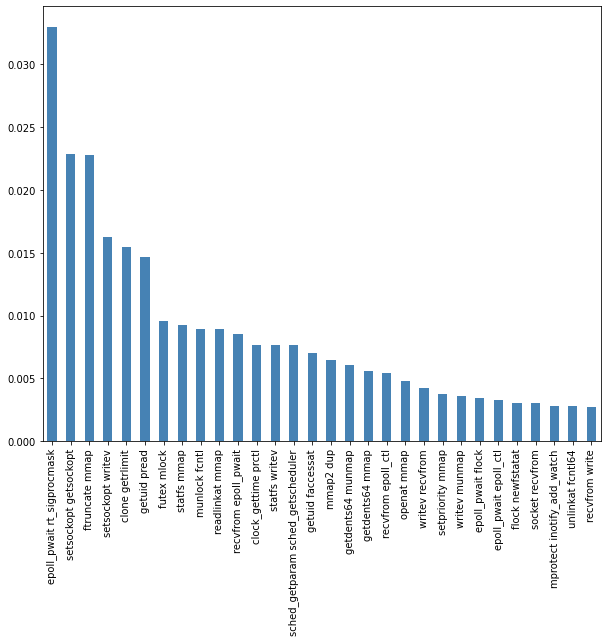

In [ ]:
import pandas as pd
pd.Series(feature[0:30], index=value[0:30]).plot.bar(color='steelblue', figsize=(10,8))

### **5) Lasso Regression**
1. It works on the regularization technique and supress the values which are irrevalent for the model.
2. It automatically finds out which features are important and which are not.
3. I have plotted the graph of the features and there importance values.

In [ ]:
from sklearn.linear_model import LassoCV
X = Trigram_model
Y = df['Label']
reg = LassoCV()
reg.fit(X, Y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,Y))
coef = pd.Series(reg.coef_,index = columns_trigram)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 109 variables and eliminated the other 4891 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

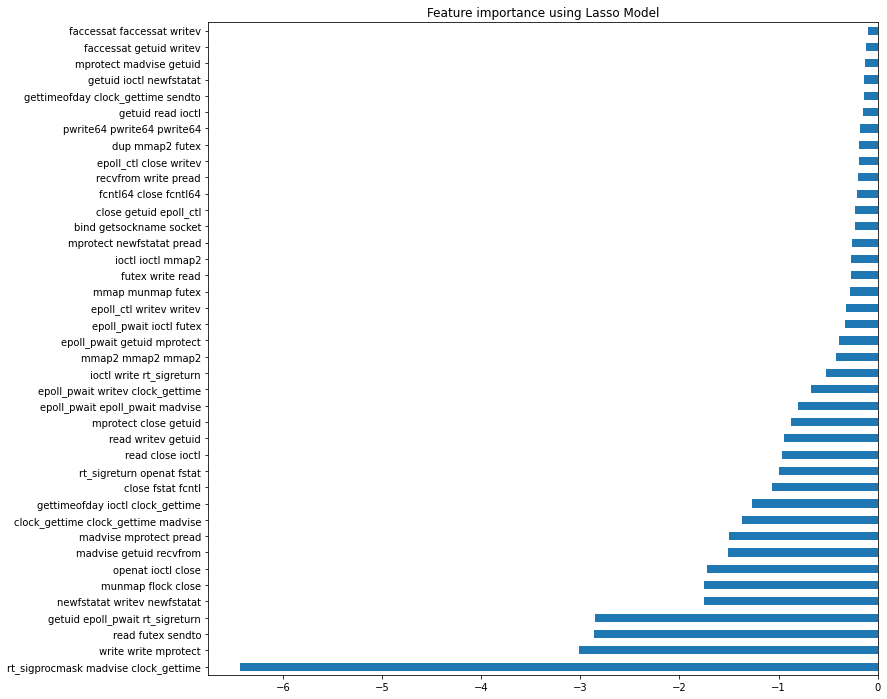

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 12)
imp_coef[0:40].plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### Tri-Gram Model after Feature Selection 
1. I have used tfidf Vectorizer on the dataset and choose the feature importance technique to extract the top 25 features.
2. Then I have fitted the model on this 25 features using SVM rbf kernel and also plotted different metrics and roc curves.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

Tfidf_vect = TfidfVectorizer(max_features=5000,ngram_range=(3,3))
Tfidf_vect.fit(df['System Calls'])
X = Tfidf_vect.transform(df['System Calls'])


df_tfidf = pd.DataFrame(X.toarray(), columns = Tfidf_vect.get_feature_names())
df_tfidf['Document Name'] = df['Document Name']
cols = df_tfidf.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_tfidf = df_tfidf[cols]
df_tfidf

,Document Name,_llseek _llseek read,_llseek read _llseek,_llseek read fstat64,_llseek read mmap2,_llseek read read,_llseek write _llseek,_llseek write fsync,bind getsockname fcntl,bind getsockname socket,clock_gettime clock_gettime clock_gettime,clock_gettime clock_gettime clone,clock_gettime clock_gettime close,clock_gettime clock_gettime dup,clock_gettime clock_gettime epoll_ctl,clock_gettime clock_gettime epoll_pwait,clock_gettime clock_gettime faccessat,clock_gettime clock_gettime fcntl64,clock_gettime clock_gettime fstatat64,clock_gettime clock_gettime futex,clock_gettime clock_gettime gettimeofday,clock_gettime clock_gettime getuid,clock_gettime clock_gettime getuid32,clock_gettime clock_gettime ioctl,clock_gettime clock_gettime madvise,clock_gettime clock_gettime mmap2,clock_gettime clock_gettime mprotect,clock_gettime clock_gettime munmap,clock_gettime clock_gettime newfstatat,clock_gettime clock_gettime openat,clock_gettime clock_gettime pread64,clock_gettime clock_gettime read,clock_gettime clock_gettime recvfrom,clock_gettime clock_gettime rt_sigprocmask,clock_gettime clock_gettime rt_sigreturn,clock_gettime clock_gettime sched_yield,clock_gettime clock_gettime sendto,clock_gettime clock_gettime write,clock_gettime clock_gettime writev,clock_gettime clone clock_gettime,...,writev write madvise,writev write mmap,writev write mmap2,writev write mprotect,writev write munmap,writev write openat,writev write pread,writev write pread64,writev write read,writev write recvfrom,writev write rt_sigprocmask,writev write sendto,writev write write,writev write writev,writev writev clock_gettime,writev writev close,writev writev epoll_ctl,writev writev epoll_pwait,writev writev faccessat,writev writev fcntl,writev writev fstat,writev writev futex,writev writev getuid,writev writev ioctl,writev writev madvise,writev writev mmap,writev writev mprotect,writev writev munmap,writev writev newfstatat,writev writev openat,writev writev pread,writev writev read,writev writev recvfrom,writev writev renameat,writev writev rt_sigprocmask,writev writev rt_sigreturn,writev writev sendto,writev writev socket,writev writev write,writev writev writev
0,com.chinadeals.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.001338,0.000000,0.000000,0.003016,0.0,0.0,0.0,0.003223,0.000000,0.000000,0.0,0.0,0.000000,0.000814,0.001281,0.001452,0.000000,0.000000,0.0,0.0,0.000000,0.001514,0.0,0.004435,0.0,0.0,0.0,0.018584,0.0,0.001073,0.094786
1,chat.cristianogratis.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004395,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.007408,0.000000,0.000933,0.000000,0.000000,0.002585,0.0,0.0,0.000000,0.000000,0.0,0.009694,0.0,0.0,0.0,0.027084,0.0,0.000000,0.158856
2,com.eterno.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002596,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.001166,0.005779,0.003076,0.002069,0.005789,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.001464,0.001172,0.000922,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.002128,0.0,0.0,0.0,0.017581,0.0,0.000000,0.056095
3,com.andromo.dev551559.app531086.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001613,0.0,0.0,0.001273,0.0,0.0,0.001156,0.0,0.000725,0.000000,0.000000,0.000000,0.000899,0.0,0.0,0.0,0.000000,0.001162,0.000000,0.0,0.0,0.000000,0.002185,0.001146,0.001299,0.000000,0.000000,0.0,0.0,0.000

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

Y = df['Label']
model = ExtraTreesClassifier(n_estimators=25)
model.fit(X, Y)
print(model.feature_importances_)
columns_bigram = list(Tfidf_vect.vocabulary_.keys())
t = list(zip(model.feature_importances_,columns_bigram))
t.sort(reverse=True)
print("Top 25 features are->")
for i in range(0,25):
    print(t[i])
feature, value = zip(*t)


[2.3798933e-04 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 6.7269187e-05
 7.3965834e-05]
Top 25 features are->
(0.0326152031268918, 'gettimeofday recvfrom gettimeofday')
(0.03142178848287472, 'lseek mmap prctl')
(0.024814919133894067, 'getsockopt close socket')
(0.02423302313372055, 'rt_sigprocmask ioctl futex')
(0.019681099932187328, 'munmap write recvfrom')
(0.017167640215531042, 'write write newfstatat')
(0.01603587393009134, 'munmap ioctl openat')
(0.013427480754515069, 'write recvfrom ioctl')
(0.013218881947960006, 'epoll_pwait read openat')
(0.013166251471418517, 'mmap mmap rt_sigprocmask')
(0.012958067253669074, 'close rt_sigprocmask pread')
(0.01234767806458918, 'sendto write rt_sigprocmask')
(0.009167051421466349, 'ioctl clock_gettime getuid32')
(0.008857218365755365, 'gettimeofday clock_gettime sendto')
(0.008689419655002407, 'ioctl dup clock_gettime')
(0.008575271401873339, 'futex ioctl newfstatat')
(0.008345249698273004, 'close write read')
(0.008320286568439098, 'clock_g

In [ ]:
z =value[0:25]
col = [i for i in z]
X = df_tfidf.loc[:,col] 
X

,gettimeofday recvfrom gettimeofday,lseek mmap prctl,getsockopt close socket,rt_sigprocmask ioctl futex,munmap write recvfrom,write write newfstatat,munmap ioctl openat,write recvfrom ioctl,epoll_pwait read openat,mmap mmap rt_sigprocmask,close rt_sigprocmask pread,sendto write rt_sigprocmask,ioctl clock_gettime getuid32,gettimeofday clock_gettime sendto,ioctl dup clock_gettime,futex ioctl newfstatat,close write read,clock_gettime epoll_pwait read,fcntl writev openat,clone newfstatat getuid,clone ioctl getuid32,futex faccessat futex,mmap close faccessat,writev getuid getuid,epoll_pwait epoll_pwait openat
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.001994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004032,0.0,0.0,0.0,0.0,0.0,0.0,0.001074,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.011626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.002871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.009424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.007612,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050692,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5818,0.0,0.0,0.0,0.002345,0.0,0.0,0.0,0.000963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013142,0.0,0.0,0.0,0.0,0.0,0.0,0.001555,0.0
5819,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032818,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5820,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.002949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017888,0.0,0.0,0.0,0.0,0.0,0.0,0.000953,0.0


In [ ]:
from sklearn import model_selection, svm

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,df['Label'],test_size=0.3,random_state=42)

In [ ]:
SVM_rbfKernel = svm.SVC(C=3, kernel='rbf', gamma=2)
SVM_rbfKernel.fit(Train_X,Train_Y)

predictions_SVM_rbfKernel = SVM_rbfKernel.predict(Test_X)



In [ ]:
from sklearn.metrics import accuracy_score
acc_rbf_tfidf = accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_rbfKernel, Test_Y)*100)

SVM Accuracy Score ->  80.99599313108186


Confusion matrix ->
[[711  53]
 [279 704]]
Classification Report ->
              precision    recall  f1-score   support

           B       0.72      0.93      0.81       764
           M       0.93      0.72      0.81       983

    accuracy                           0.81      1747
   macro avg       0.82      0.82      0.81      1747
weighted avg       0.84      0.81      0.81      1747



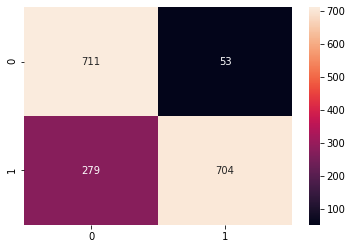

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix ->")
print(confusion_matrix(Test_Y,predictions_SVM_rbfKernel))

print("Classification Report ->")
print(classification_report(Test_Y,predictions_SVM_rbfKernel))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y,predictions_SVM_rbfKernel)

sns.heatmap(cm,annot=True,fmt='g')

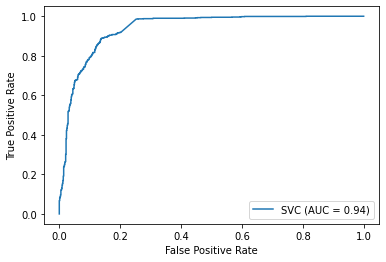

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(SVM_rbfKernel, Test_X, Test_Y) 
plt.show()

# **Question 4 Clustering Algorithms**
Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

Tfidf_vect = TfidfVectorizer(max_features=5000,ngram_range=(1,1))
Tfidf_vect.fit(df['System Calls'])
X = Tfidf_vect.transform(df['System Calls'])


df_tfidf = pd.DataFrame(X.toarray(), columns = Tfidf_vect.get_feature_names())
df_tfidf['Document Name'] = df['Document Name']
cols = df_tfidf.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_tfidf = df_tfidf[cols]
df_tfidf


,Document Name,_llseek,bind,capget,clock_gettime,clone,close,connect,dup,epoll_create1,epoll_ctl,epoll_pwait,eventfd2,faccessat,fchmod,fchmodat,fcntl,fcntl64,fdatasync,flock,fstat,fstat64,fstatat64,fsync,ftruncate,ftruncate64,futex,getcwd,getdents64,getegid,getegid32,geteuid,geteuid32,getpid,getppid,getpriority,getrlimit,getsockname,getsockopt,gettid,...,openat,pipe2,ppoll,prctl,pread,pread64,pwrite,pwrite64,read,readlinkat,recvfrom,renameat,rt_sigaction,rt_sigprocmask,rt_sigreturn,sched_getparam,sched_getscheduler,sched_yield,sendmsg,sendto,setpriority,setrlimit,setsockopt,shutdown,sigaction,sigreturn,socket,socketpair,stat64,statfs,statfs64,tgkill,tkill,ugetrlimit,uname,unlinkat,utimensat,wait4,write,writev
0,com.chinadeals.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.000593,0.027595,0.0,0.007276,0.000000,0.015406,0.486590,0.0,0.000311,0.0,0.000000,0.005856,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.031091,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000635,0.0,0.0,0.0,...,0.015287,0.000000,0.0,0.001213,0.082410,0.0,0.000000,0.0,0.180168,0.000548,0.518655,0.000000,0.0,0.078882,0.000000,0.0,0.0,0.016333,0.000000,0.314580,0.000568,0.000869,0.0,0.0,0.0,0.0,0.0,0.001107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.267231,0.113144
1,chat.cristianogratis.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.000730,0.019107,0.0,0.007357,0.000000,0.018643,0.317636,0.0,0.001533,0.0,0.002168,0.008582,0.0,0.000000,0.0,0.001552,0.0,0.0,0.003028,0.0,0.0,0.032454,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.003393,0.000000,0.0,0.000000,0.075191,0.0,0.000000,0.0,0.101963,0.000000,0.646377,0.003333,0.0,0.009277,0.000000,0.0,0.0,0.027168,0.000000,0.570744,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003208,0.0,0.0,0.166216,0.132157
2,com.eterno.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.005048,0.021287,0.0,0.003402,0.000000,0.009913,0.207178,0.0,0.008152,0.0,0.000000,0.037601,0.0,0.005264,0.0,0.048700,0.0,0.0,0.000000,0.0,0.0,0.038095,0.0,0.00000,0.0,0.0,0.016554,0.0,0.0,0.000000,0.007138,0.000000,0.0,0.0,0.0,...,0.012138,0.000000,0.0,0.001190,0.046529,0.0,0.011429,0.0,0.054056,0.000000,0.672197,0.000000,0.0,0.011181,0.000550,0.0,0.0,0.002889,0.000000,0.600475,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.182486,0.090842
3,com.andromo.dev551559.app531086.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.009158,0.047608,0.0,0.011388,0.000873,0.011964,0.509608,0.0,0.000310,0.0,0.000000,0.006944,0.0,0.000000,0.0,0.001256,0.0,0.0,0.000000,0.0,0.0,0.083732,0.0,0.00117,0.0,0.0,0.000000,0.0,0.0,0.000778,0.000000,0.001266,0.0,0.0,0.0,...,0.041685,0.000824,0.0,0.000906,0.181729,0.0,0.000000,0.0,0.035253,0.000545,0.355259,0.000000,0.0,0.122102,0.000418,0.0,0.0,0.000000,0.001446,0.295408,0.000566,0.000000,0.0,0.0,0.0,0.0,0.0,0.001654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.081974,0.111689
4,com.blinkslabs.blinkist.android.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.005554,0.068540,0.0,0.014597,0.000000,0.032828,0.316841,0.0,0.015825,0.0,0.003533,0.095480,0.0,0.023663,0.0,0.093607,0.0,0.0,0.000000,0.0,0.0,0.163663,0.0,0.00000,0.0,0.0,0.035704,0.0,0.0,0.000000,0.020056,0.000000,0.0,0.0,0.0,...,0.033517,0.000000,0.0,0.001622,0.200713,0.0,0.057323,0.0,0.067061,0.000000,0.435994,0.000000,0.0,0.034942,0.000000,0.0,0.0,0.004723,0.000000,0.352753,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.156857,0.271705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,a0bffc11168c65beb59c326d88f144f0d750634252a507...,0.0,0.0,0.0,0.0,0.007177,0.065576,0.0,0.044014,0.000000,0.006318,0.374608,0.0,0.000000,0.0,0.000000,0.006748,0.0,0.000000,0.0,0.000000,0.0,0.0

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

Y = df['Label']
columns = list(Tfidf_vect.vocabulary_.keys())
columns
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)


t = list(zip(model.feature_importances_,columns))
t.sort(reverse=True)
print("Top 10 features are->")
for i in range(0,10):
    print(t[i])
feature, value = zip(*t)

Top 10 features are->
(0.22569754357851118, 'ftruncate')
(0.05947166346090109, 'eventfd2')
(0.04273844263432285, 'mknodat')
(0.036214004653891484, 'getdents64')
(0.03428746793420386, 'lseek')
(0.033767308936964294, 'clock_gettime')
(0.03070192607420071, 'connect')
(0.030306344955278612, 'futex')
(0.028270353175266372, 'stat64')
(0.02654393737617977, 'setpriority')


In [ ]:
z =value[0:10]
col = [i for i in z]
X = df_tfidf.loc[:,col] 
X

,ftruncate,eventfd2,mknodat,getdents64,lseek,clock_gettime,connect,futex,stat64,setpriority
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.031091,0.0,0.000568
1,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.032454,0.0,0.000000
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.038095,0.0,0.000000
3,0.0,0.0,0.0,0.00117,0.0,0.0,0.0,0.083732,0.0,0.000566
4,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.163663,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
5817,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.042127,0.0,0.000000
5818,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.060897,0.0,0.000000
5819,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.017257,0.0,0.000000
5820,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.004794,0.0,0.000000


## **K Means Clustering**
K-means is a centroid-based algorithm where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid and here K is predefined.

1. Using Elbow method, I have find the optimal number of clusters and then plotted a graph for it. 

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,6):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    print("cluster",i)
    wcss.append(kmeans.inertia_)

    


cluster 1
cluster 2
cluster 3
cluster 4
cluster 5


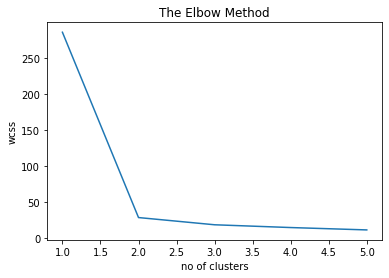

In [ ]:
plt.plot(range(1,6), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
z =value[0:10]
col = [i for i in z]
X = df_tfidf.loc[:,col] 
X
kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
X =X.iloc[:, [4,6]].values
y_kmeans= kmeansmodel.fit_predict(X)

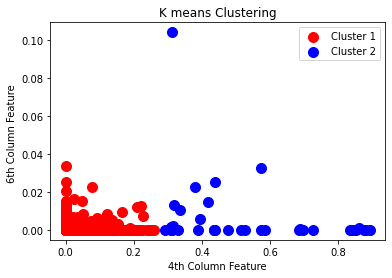

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('K means Clustering')
plt.xlabel('4th Column Feature')
plt.ylabel('6th Column Feature ')
plt.legend()
plt.show()


## **DBSCAN**
Density-based spatial clustering of applications with noise (DBSCAN) is an unsupervised learning method that identify different clusters in the data such that a cluster in the data contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.

DBSCAN finds the optimal number of clusters on its own.

In [ ]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=5,min_samples=4,metric='euclidean')

In [ ]:
z =value[0:10]
col = [i for i in z]
X = df_tfidf.loc[:,col] 
X
model=db.fit(X)

In [ ]:
label=model.labels_
label

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn import metrics
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True
n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


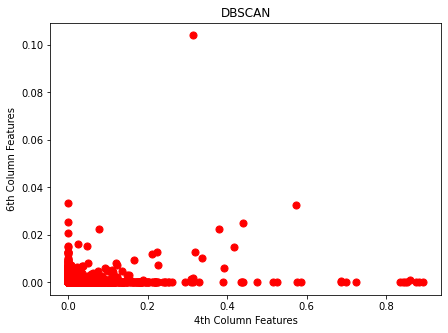

In [ ]:
X =X.iloc[:, [4,6]].values
y_means = db.fit_predict(X)
plt.figure(figsize=(7,5))
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 50, c = 'red')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 50, c = 'yellow')
plt.xlabel('4th Column Features')
plt.ylabel('6th Column Features')
plt.title('DBSCAN')
plt.show()

## **Hierarchial Clustering**
Hierarchical clustering  is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.



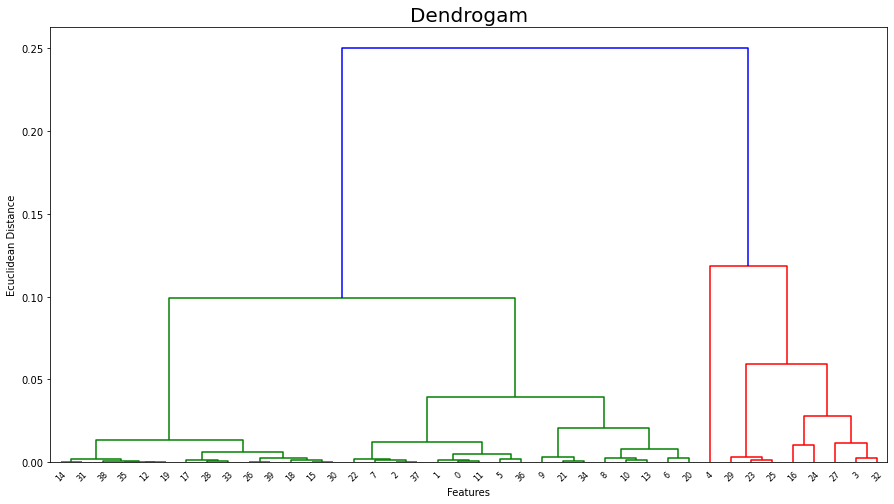

In [ ]:
import scipy.cluster.hierarchy as sch
z =value[0:10]
col = [i for i in z]
X = df_tfidf.loc[:,col] 
X
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(X.iloc[:40, [7,9]].values, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Features')

plt.ylabel('Ecuclidean Distance')
plt.show()

No handles with labels found to put in legend.


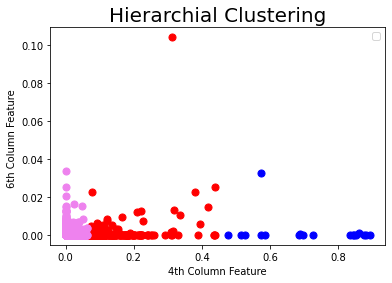

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
X =X.iloc[:, [4,6]].values
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'violet')

plt.title('Hierarchial Clustering', fontsize = 20)

plt.xlabel('4th Column Feature')
plt.ylabel('6th Column Feature ')

plt.legend()

plt.show()